<a href="https://colab.research.google.com/github/afiarodoshe/Seizure-detection/blob/main/Overview_of_dataset%2Cpre_processing_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Download**

Kaggle install

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Downloading the UPenn and Mayo Clinic's Seizure Detection Challenge Data from Kaggle

In [ ]:
!kaggle competitions download -c seizure-detection --force

100% 10.1G/10.1G [07:22<00:00, 23.0MB/s]
100% 10.1G/10.1G [07:22<00:00, 24.5MB/s]


Unzipping the data

In [ ]:
! unzip seizure-detection

Archive:  seizure-detection.zip
  inflating: clips.tar.gz            
  inflating: sampleSubmission.csv    
  inflating: sample_clip.mat.gz      


Unzipping the dataset

In [ ]:
!tar xvzf clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/

Streaming output truncated to the last 5000 lines.
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2596.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2597.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2598.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2599.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_26.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_260.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2600.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2601.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2602.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2/Dog_2_test_segment_2603.mat
Volumes/Seagate/seizure_detection/competit

The files are matlab files that can be loaded in using a function from scipy

Loading Patient 1 data

In [ ]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file
upenn_baseline_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_baseline_file

from scipy.io import loadmat

# Load the .mat file using the full file path
# Corrected: Using upenn_seizure_file instead of upenn_seizure_file_path
mat = loadmat(upenn_seizure_file)
# Corrected: Using upenn_baseline_file instead of upenn_baseline_file_path
mat = loadmat(upenn_baseline_file)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 21:58:11 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ -45.68 ,  -53.68 ,  -66.68 , ...,   86.32 ,  111.32 ,  132.32 ],
        [ 192.15 ,  220.15 ,  235.15 , ...,   82.15 ,   72.15 ,   81.15 ],
        [ 332.93 ,  364.93 ,  362.93 , ...,  174.93 ,  136.93 ,  110.93 ],
        ...,
        [ 292.124,  326.124,  372.124, ...,  126.124,   99.124,   86.124],
        [-456.278, -435.278, -409.278, ...,  399.722,  322.722,  280.722],
        [-340.04 , -321.04 , -296.04 , ...,  223.96 ,  209.96 ,  187.96 ]]),
 'freq': array([499.906994]),
 'channels': array([[(array(['LFG1'], dtype='<U4'), array(['LFG10'], dtype='<U5'), array(['LFG11'], dtype='<U5'), array(['LFG12'], dtype='<U5'), array(['LFG13'], dtype='<U5'), array(['LFG14'], dtype='<U5'), array(['LFG15'], dtype='<U5'), array(['LFG16'], dtype='<U5'), array(['LFG17'], dtype='<U5'), array(['LFG18'], dtype='<U5'), array(['LF

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file.split('/')[-1]  # Get only the filename
upenn_baseline_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_baseline_file.split('/')[-1] # Get only the filename

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)

# It looks like you intended to save one of the returned DataFrames
# Change feature_df to either upenn_seizure_df or upenn_baseline_df
upenn_seizure_df.to_csv('Patient1.csv', index=False)

Ictal


LFG1    LFG10    LFG11   LFG12    LFG13    LFG14   LFG15    LFG16  \
0 -27.292  580.074  285.822 -231.57 -143.324 -320.362 -390.36  277.874   
1 -25.292  597.074  307.822 -196.57 -141.324 -278.362 -419.36  248.874   
2 -35.292  605.074  307.822 -133.57 -114.324 -243.362 -393.36  250.874   
3 -50.292  629.074  279.822  -76.57  -39.324 -196.362 -337.36  260.874   
4 -52.292  639.074  239.822  -74.57   -5.324 -193.362 -301.36  219.874   

     LFG17    LFG18  ...   LFG62   LFG63    LFG64    LFG7    LFG8     LFG9  \
0  344.852  -78.812  ...  12.232 -33.376 -329.166 -108.82   96.43 -186.782   
1  336.852  -97.812  ...  18.232 -46.376 -326.166 -107.82  139.43 -175.782   
2  309.852 -165.812  ...  15.232 -46.376 -312.166 -116.82  154.43 -173.782   
3  307.852 -211.812  ... -24.768 -69.376 -318.166 -106.82  158.43 -154.782   
4  296.852 -231.812  ... -17.768 -45.376 -305.166 -100.82  141.43 -150.782   

      LFS1     LFS2     LFS3    LFS4  
0 -107.986 -235.962 -436.144 -289.92  
1 -110.986 -251.962 -455.144 -297.92  
2 -137.986 -253.962 -446.144 -306.92  
3 -147.986 -262.962 -425.144 -314.92  
4 -141.986 -262.962 -422.144 -297.92  

[5 rows x 68 columns]


Interictal


LFG1   LFG10   LFG11    LFG12    LFG13   LFG14    LFG15    LFG16    LFG17  \
0 -45.68  192.15  332.93  460.264   95.666  19.972  562.634   63.064  -44.598   
1 -53.68  220.15  364.93  508.264  135.666  46.972  526.634   47.064  -57.598   
2 -66.68  235.15  362.93  540.264  147.666  31.972  468.634   96.064  -68.598   
3 -79.68  236.15  337.93  543.264  125.666  18.972  436.634   95.064 -116.598   
4 -81.68  243.15  336.93  482.264  120.666  15.972  441.634  101.064 -137.598   

     LFG18  ...    LFG62    LFG63    LFG64     LFG7     LFG8     LFG9  \
0  127.856  ... -152.664 -263.668 -108.322  340.596  362.698 -237.248   
1  140.856  ... -146.664 -259.668 -102.322  362.596  354.698 -207.248   
2  152.856  ... -137.664 -259.668 -104.322  377.596  331.698 -201.248   
3  123.856  ... -115.664 -267.668 -124.322  368.596  297.698 -215.248   
4   83.856  ...  -97.664 -300.668 -150.322  393.596  301.698 -241.248   

      LFS1     LFS2     LFS3    LFS4  
0 -123.108  292.124 -456.278 -340.04  
1 -145.108  326.124 -435.278 -321.04  
2 -154.108  372.124 -409.278 -296.04  
3 -168.108  399.124 -389.278 -287.04  
4 -177.108  406.124 -378.278 -287.04  

[5 rows x 68 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, data_class, location, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        data_class (str): Class label to be assigned to the data ('baseline' or 'seizure').
        location (str): Location label for the data.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Transpose the DataFrame to make channels as rows
    df = df.transpose()

    # Create a new DataFrame with class and location columns
    df['class'] = data_class
    df['location'] = location
    df['class_id'] = df.index  # Assign index (channel names) to class_id
    df['location'] = [location_mapping.get(channel, 'unknown') for channel in channels_list]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file.split('/')[-1]  # Get only the filename
upenn_baseline_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_baseline_file.split('/')[-1] # Get only the filename

# Location for both seizure and baseline data
location_mapping = {}
for i in range(1, 70):  # Assuming LFG1 to LFG32
    location_mapping[f'LFG{i}'] = 'intracranial epileptogenic zone'
for i in range(1, 70):  # Assuming LFS1 to LFS36
    location_mapping[f'LFS{i}'] = 'surface'

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, 'seizure', location_mapping, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, 'baseline', location_mapping, output=True)

# Combine both DataFrames into one
combined_df = pd.concat([upenn_seizure_df, upenn_baseline_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('Patient1up.csv', index=False)

print("Patient1up.csv'")

Ictal


0        1        2        3        4        5        6        7  \
LFG1   -27.292  -25.292  -35.292  -50.292  -52.292  -53.292  -60.292  -50.292   
LFG10  580.074  597.074  605.074  629.074  639.074  635.074  632.074  644.074   
LFG11  285.822  307.822  307.822  279.822  239.822  220.822  223.822  242.822   
LFG12 -231.570 -196.570 -133.570  -76.570  -74.570  -78.570  -77.570  -70.570   
LFG13 -143.324 -141.324 -114.324  -39.324   -5.324   -0.324   13.676   22.676   

             8        9  ...      493      494      495      496      497  \
LFG1   -44.292  -33.292  ... -236.292 -200.292 -202.292 -181.292 -225.292   
LFG10  666.074  670.074  ... -171.926 -151.926 -189.926 -180.926 -250.926   
LFG11  258.822  274.822  ...   39.822   46.822   43.822   84.822   40.822   
LFG12  -67.570  -49.570  ...   14.430   35.430   14.430   28.430  -32.570   
LFG13   10.676  -29.324  ...  149.676  162.676  132.676  158.676  105.676   

           498      499    class                         location  class_id  
LFG1  -222.292 -239.292  seizure  intracranial epileptogenic zone      LFG1  
LFG10 -237.926 -257.926  seizure  intracranial epileptogenic zone     LFG10  
LFG11   56.822   28.822  seizure  intracranial epileptogenic zone     LFG11  
LFG12  -19.570   -9.570  seizure  intracranial epileptogenic zone     LFG12  
LFG13  136.676  151.676  seizure  intracranial epileptogenic zone     LFG13  

[5 rows x 503 columns]


Interictal


0        1        2        3        4        5        6        7  \
LFG1   -45.680  -53.680  -66.680  -79.680  -81.680  -95.680  -83.680  -72.680   
LFG10  192.150  220.150  235.150  236.150  243.150  225.150  210.150  215.150   
LFG11  332.930  364.930  362.930  337.930  336.930  326.930  333.930  364.930   
LFG12  460.264  508.264  540.264  543.264  482.264  359.264  287.264  291.264   
LFG13   95.666  135.666  147.666  125.666  120.666  125.666  120.666  140.666   

             8        9  ...      493      494      495      496      497  \
LFG1   -65.680  -59.680  ...   67.320   71.320   85.320   79.320   86.320   
LFG10  220.150  213.150  ...   86.150  121.150  120.150   99.150   82.150   
LFG11  376.930  351.930  ...  189.930  207.930  209.930  205.930  174.930   
LFG12  288.264  316.264  ...  355.264  349.264  305.264  231.264  198.264   
LFG13  150.666  143.666  ... -103.334 -109.334 -122.334 -160.334 -208.334   

           498      499     class                         location  class_id  
LFG1   111.320  132.320  baseline  intracranial epileptogenic zone      LFG1  
LFG10   72.150   81.150  baseline  intracranial epileptogenic zone     LFG10  
LFG11  136.930  110.930  baseline  intracranial epileptogenic zone     LFG11  
LFG12  142.264   74.264  baseline  intracranial epileptogenic zone     LFG12  
LFG13 -261.334 -279.334  baseline  intracranial epileptogenic zone     LFG13  

[5 rows x 503 columns]

Patient1up.csv'


In [ ]:
import pandas as pd

def transpose_csv(input_file, output_file):
    """
    Transposes the CSV file: converts columns to rows and rows to columns.

    Parameters:
        input_file (str): Path to the input CSV file.
        output_file (str): Path where the transposed CSV file will be saved.
    """
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Transpose the DataFrame
    transposed_df = df.T

    # Reset the index to make the transposed DataFrame cleaner
    transposed_df.reset_index(inplace=True)

    # Save the transposed DataFrame to a new CSV file
    transposed_df.to_csv(output_file, index=False)

# Define the input and output file paths
input_csv_file = 'Patient1.csv'  # Change this to your input file path
output_csv_file = 'Patient1_transposed.csv'  # Change this to your desired output file path

# Call the function to transpose the CSV
transpose_csv(input_csv_file, output_csv_file)

print("CSV file has been transposed and saved as:", output_csv_file)


CSV file has been transposed and saved as: Patient1_transposed.csv


Plot Patient 1 data

Interictal


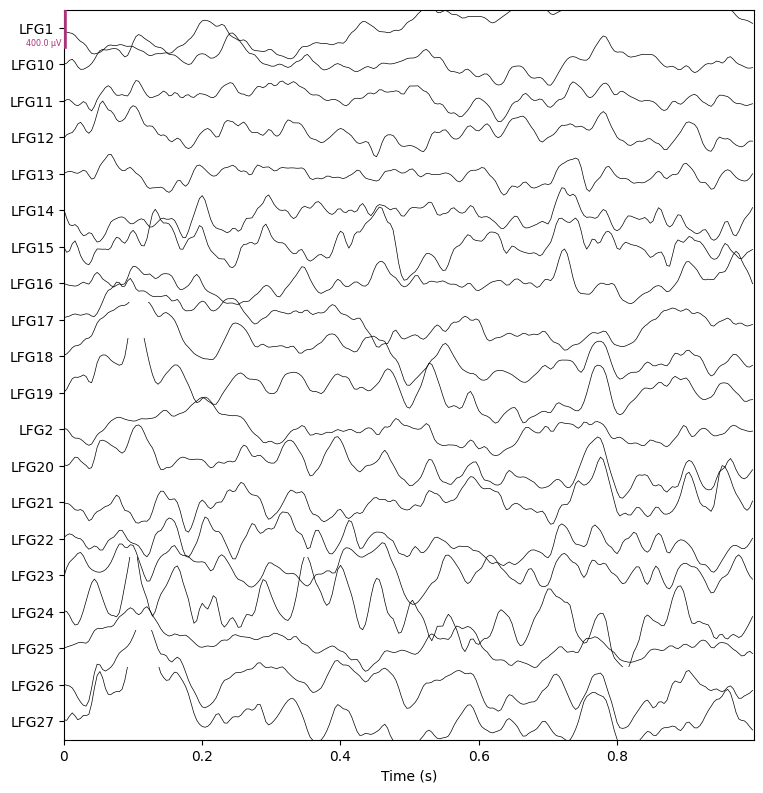


Ictal


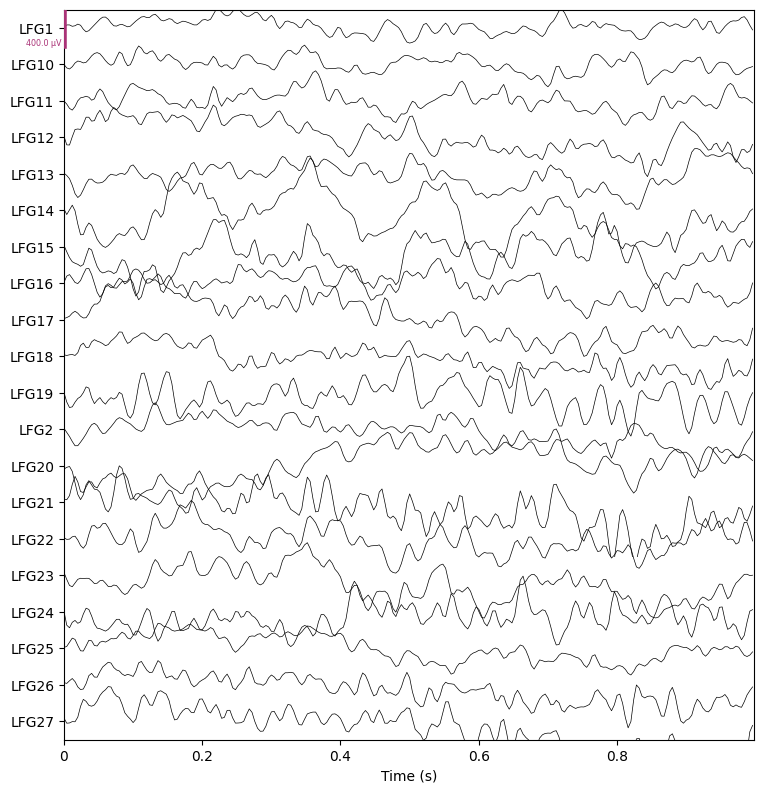

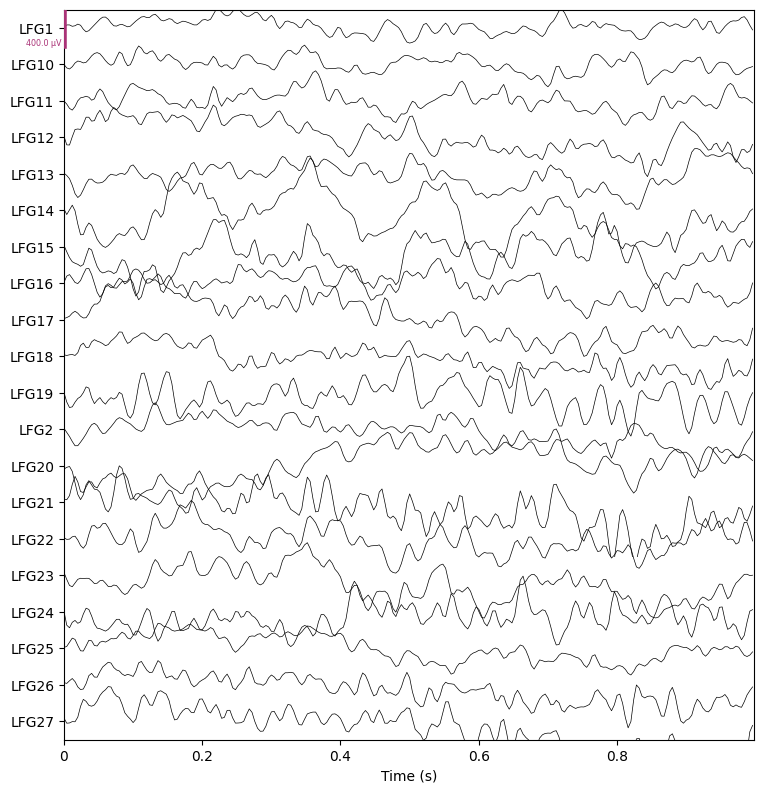

In [ ]:
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # Convert the data to numeric, handling errors by coercing to NaN
  data = data.apply(pd.to_numeric, errors='coerce')

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Loading Patient 2 data

In [ ]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/' + upenn_seizure_file
upenn_baseline_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/' + upenn_baseline_file
from scipy.io import loadmat

# Load the .mat file using the full file path
mat = loadmat(upenn_seizure_file_path)
mat
mat = loadmat(upenn_baseline_file_path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 23:42:37 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[  78.1856,   79.1856,   79.1856, ..., -121.8144, -120.8144,
         -120.8144],
        [ -37.3686,  -37.3686,  -36.3686, ...,  -47.3686,  -47.3686,
          -47.3686],
        [ -40.0754,  -39.0754,  -38.0754, ...,  -44.0754,  -44.0754,
          -44.0754],
        ...,
        [ -11.2274,  -11.2274,  -10.2274, ...,  -65.2274,  -65.2274,
          -64.2274],
        [ -64.2718,  -64.2718,  -64.2718, ...,  -53.2718,  -52.2718,
          -53.2718],
        [ -19.479 ,  -18.479 ,  -17.479 , ...,  -96.479 ,  -95.479 ,
          -94.479 ]]),
 'freq': array([5000.]),
 'channels': array([[(array(['LMacro_01'], dtype='<U9'), array(['LMacro_02'], dtype='<U9'), array(['LMacro_03'], dtype='<U9'), array(['LMacro_04'], dtype='<U9'), array(['LMacro_05'], dtype='<U9'), array(['LMacro_06'], dtype='<U9'), array(['LMacro_07'], dty

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = os.path.join('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/', upenn_seizure_file.split('/')[-1])
upenn_baseline_file = os.path.join('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/', upenn_baseline_file.split('/')[-1])

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)

upenn_seizure_df.to_csv('Patient_2_upenn_seizure.csv', index=False)
upenn_baseline_df.to_csv('Patient_2_upenn_baseline.csv', index=False)

Ictal


LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0    -95.757  -102.6404   -110.241     -0.403    11.3524    -3.2018   
1    -92.757   -99.6404   -107.241      0.597    12.3524    -2.2018   
2    -88.757   -96.6404   -103.241      2.597    13.3524     0.7982   
3    -84.757   -93.6404    -98.241      5.597    13.3524     2.7982   
4    -80.757   -90.6404    -93.241      8.597    15.3524     3.7982   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0   -11.8726     -5.087    37.9558    47.3016    94.4578    54.1332   
1   -11.8726     -5.087    37.9558    46.3016    94.4578    54.1332   
2    -9.8726     -3.087    37.9558    48.3016    95.4578    55.1332   
3    -6.8726     -0.087    39.9558    50.3016    97.4578    57.1332   
4    -5.8726      1.913    40.9558    52.3016    99.4578    59.1332   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0    -2.3298      0.111   -14.4998   -26.2888  
1    -2.3298      0.111   -15.4998   -27.2888  
2    -0.3298      2.111   -14.4998   -26.2888  
3     1.6702      4.111   -11.4998   -25.2888  
4     2.6702      6.111   -10.4998   -23.2888


Interictal


LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0    78.1856   -37.3686   -40.0754    -45.363   -23.2202   -15.9858   
1    79.1856   -37.3686   -39.0754    -46.363   -23.2202   -16.9858   
2    79.1856   -36.3686   -38.0754    -47.363   -23.2202   -15.9858   
3    79.1856   -37.3686   -38.0754    -48.363   -23.2202   -15.9858   
4    78.1856   -38.3686   -40.0754    -48.363   -24.2202   -15.9858   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0   -23.9644   -27.4992    49.7346    77.3476    94.5962    56.7236   
1   -23.9644   -27.4992    50.7346    76.3476    94.5962    56.7236   
2   -22.9644   -28.4992    49.7346    76.3476    93.5962    56.7236   
3   -23.9644   -30.4992    48.7346    75.3476    93.5962    55.7236   
4   -23.9644   -31.4992    47.7346    74.3476    93.5962    54.7236   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0     -19.63   -11.2274   -64.2718    -19.479  
1     -17.63   -11.2274   -64.2718    -18.479  
2     -16.63   -10.2274   -64.2718    -17.479  
3     -16.63   -11.2274   -64.2718    -18.479  
4     -17.63   -12.2274   -65.2718    -20.479

Plot Patient 2 data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.1 MB/s eta 0:00:00
ERROR: unknown command "isntall" - maybe you meant "install"
Interictal


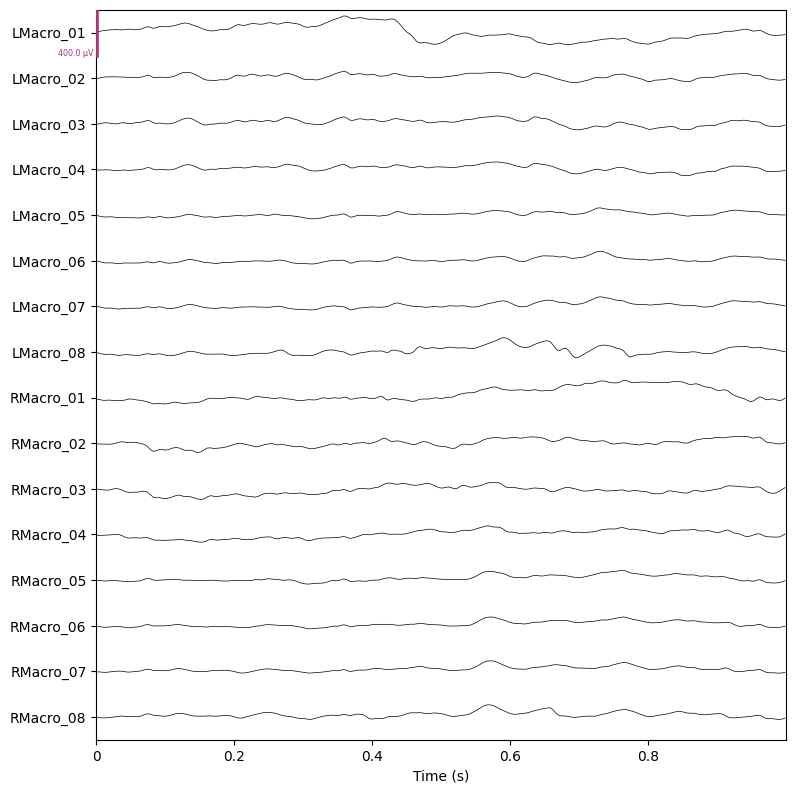


Ictal


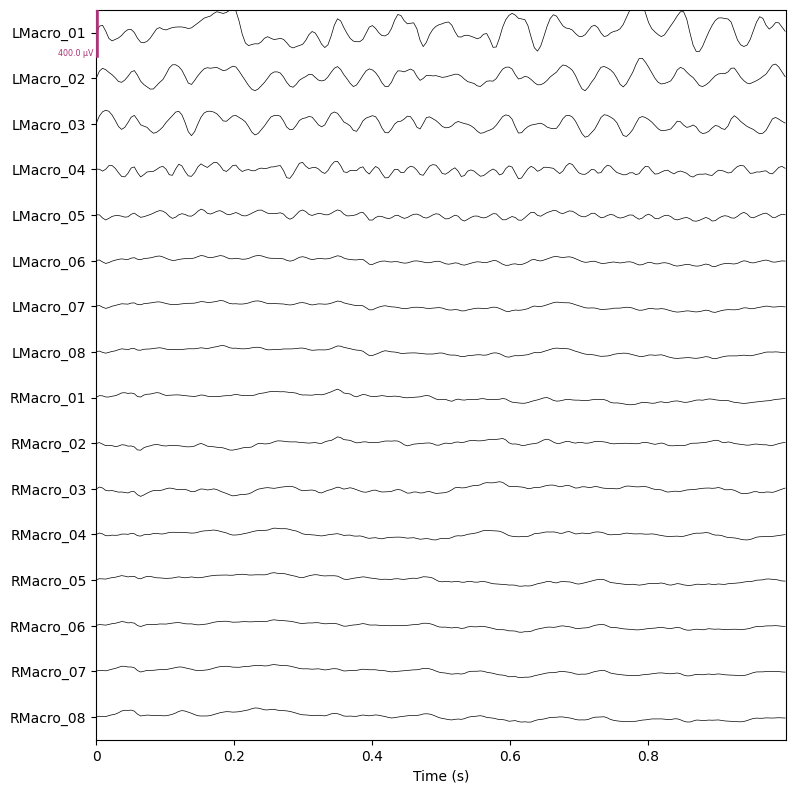

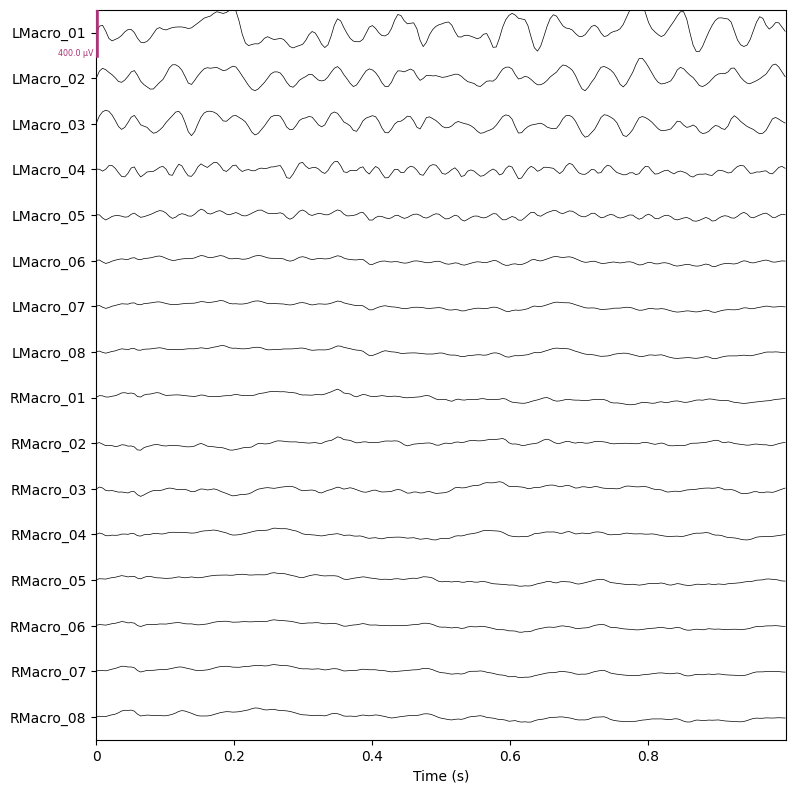

In [ ]:
!pip install mne
!pip isntall teamcolor
import mne # Import the mne library
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Printing the number od channels

In [ ]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'
# and the channels are represented as columns:

num_channels = len(baseline_df.columns)
print(f"Number of channels: {num_channels}")

Number of channels: 16


In [ ]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'part_feature_df'
# and the 'class' column represents the data type (0 for baseline, 1 for seizure)

# Count the occurrences of each class
class_counts = part_feature_df.index.value_counts()

# Print the counts
print(f"Number of seizure data: {class_counts.get(1, 0)}")
print(f"Number of baseline data: {class_counts.get(0, 0)}")

Number of seizure data: 151
Number of baseline data: 2990


In [ ]:
!pip install matplotlib pandas==0.23.0
!pip install numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=8ea5c207f6131d0da140b4b65b3f35c60b4fab3cb2d2d8bab422e2982f2be14d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/Eldave93/Seizure-Feature-Extraction

Cloning into 'Seizure-Feature-Extraction'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 10), reused 6 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 18.43 KiB | 571.00 KiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
from pathlib import Path
import sys

# Full path to the Seizure_Feature_Extraction.py file
seizure_feature_file = Path("/content/Seizure-Feature-Extraction/Seizure_Feature_Extraction.py")

# Add the parent directory of the file to the system path
seizure_feature_path = seizure_feature_file.parent
sys.path.append(str(seizure_feature_path))

In [ ]:
import glob            # for file locations
import pprint          # for pretty printing
import re
from getpass import getpass
import pyedflib
from collections import Counter
from pywt import swt
import math
from bs4 import BeautifulSoup
from Seizure_Feature_Extraction import Seizure_Features
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile
import pandas as pd     # dataframes
from tqdm import tqdm_notebook as tqdm
from getpass import getpass
import os
from scipy.io import loadmat
import mne
import numpy as np
import tables
import numpy as np
import tables
import os
from urllib.request import urlretrieve
import wfdb
import re
import pandas as pd
import numpy as np
import pyedflib
from sklearn.preprocessing import StandardScaler
from scipy import signal
import sys
import warnings
from tqdm import tqdm_notebook as tqdm

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [ ]:
def window(a, w, o, copy = False):
  # if there is no window to be applied
  if w == None:
      view = np.expand_dims(a.T, axis=0)

  # otherwise...
  else:
      sh = (a.size - w + 1, w)
      st = a.strides * 2
      if o:
          view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
      else:
          view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::w]
  if copy:
      return view.copy()
  else:
      return view

def window_x(data, window_size, overlap):

  for i, column in enumerate(data.columns):

    # window the data so each row is another epoch
    channel_windowed = window(data[column], w = window_size, o = overlap, copy = True)
    channel_windowed = np.reshape(channel_windowed, (*channel_windowed.shape, -1))

    if i ==0:
      windowed_data = channel_windowed
    else:
      windowed_data = np.concatenate((windowed_data, channel_windowed), axis=-1)

  return windowed_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Run the code and create/overwite old data?
UPENN_OVERWRITE = True

# Make the frame for all patients or just patient 2 (False)?
UPENN_ALL_PART = False

# Where to save the feature data
UPENN_SAVE_PATH = '/content/drive/My Drive/Data/UPennMayo_features.hdf5'

if UPENN_ALL_PART:
  UPENN_SAVE_PATH = '/content/drive/My Drive/Data/UPennMayo_all_features.hdf5'

In [ ]:
# Set MNE to only output warnings
mne.set_log_level('WARNING')

def save_to_database(save_dir, part_id, combined_df, condition):
    h5file = tables.open_file(save_dir, mode="a", title="Patient 2 Features")

    if "/" + part_id in h5file:
        part_x_array = h5file.get_node("/" + part_id + '/Data_x')
        part_y_array = h5file.get_node("/" + part_id + '/Data_y')

        data_x_labels = h5file.get_node('/' + part_id + '/Data_x_Feat_Names')
        combined_df = combined_df.reindex(data_x_labels[:].astype(str), axis=1)

    else:
        part_group = h5file.create_group("/", part_id, 'Participant Data')
        x_atom = tables.Atom.from_dtype(combined_df.values.dtype)
        y_atom = tables.Atom.from_dtype(condition.dtype)

        part_x_array = h5file.create_earray("/" + part_id, 'Data_x', x_atom, (0, combined_df.shape[1]), 'Feature Array')
        part_y_array = h5file.create_earray("/" + part_id, 'Data_y', y_atom, (0, 1), 'Events Array')

        h5file.create_array("/" + part_id, 'Data_x_Feat_Names', np.array(combined_df.columns, dtype='unicode'), "Names of Each Feature")

    part_x_array.append(combined_df.values)
    part_y_array.append(condition)

    h5file.flush()
    h5file.close()

def mat_to_df(file_path, output=False):
    mat = loadmat(file_path)
    data = mat['data']
    channels = mat['channels']
    freq = mat['freq'][0]

    channels_list = [channel_array[0] for channel_array in channels[0][0]]

    df = pd.DataFrame(data, index=channels_list).T
    df = df.loc[:, (df != df.iloc[0]).any()]

    if output:
        display(df.head())

    return df, freq

def file_class(file_name):
    if re.findall('interictal', file_name):
        return 0
    elif re.findall('ictal', file_name):
        return 1
    else:
        return 2

# Path to Patient_2 data
UPENN_DIR = '/content/Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2'

# Set path for saving features
UPENN_SAVE_PATH = 'Patient_2_features.h5'

if os.path.exists(UPENN_SAVE_PATH):
    os.remove(UPENN_SAVE_PATH)

# Process files in Patient_2 folder
part_id = 'Patient_2'
part_file_list = file_list(os.path.join(UPENN_DIR, '*'), output=False)

for file in tqdm(part_file_list, desc='Patient_2 Files'):
    df, freq = mat_to_df(file)
    class_name = file_class(file)

    feat = Seizure_Features(sf=freq,
                            window_size=None,
                            bandpasses=[[2, 4], [4, 8], [8, 12], [12, 30], [30, 70]],
                            feature_list=['power', 'power_ratio', 'mean', 'mean_abs',
                                          'std', 'ratio', 'LSWT', 'fft_corr', 'fft_eigen',
                                          'time_corr', 'time_eigen'])

    part_x_feat = feat.transform(df.values, channel_names_list=list(df.columns))
    part_x_feat = pd.DataFrame(part_x_feat, columns=feat.feature_names)

    part_y_feat = np.expand_dims(np.array([class_name]), axis=1)

    save_to_database(UPENN_SAVE_PATH, part_id, part_x_feat, part_y_feat)


<ipython-input-39-c2cf9e8363a7>:67: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(part_file_list, desc='Patient_2 Files'):


Patient_2 Files:   0%|          | 0/7035 [00:00<?, ?it/s]

In [ ]:
import tables
import pandas as pd

def h5_to_csv(h5_file_path, output_csv_path):
    # Open the HDF5 file
    with tables.open_file(h5_file_path, mode="r") as h5file:
        # Initialize an empty DataFrame to collect the data
        all_data = pd.DataFrame()

        # Iterate over each participant's data group in the HDF5 file
        for part in h5file.root:
            # Extract features (Data_x) and labels (Data_y) for each participant
            data_x = part.Data_x.read()  # Extract feature data
            data_y = part.Data_y.read()  # Extract label data (conditions)

            # Convert the feature names to a list
            feature_names = h5file.get_node(f'/{part._v_name}/Data_x_Feat_Names').read().astype(str)

            # Create a DataFrame for the feature data and label
            part_df = pd.DataFrame(data_x, columns=feature_names)
            part_df['Label'] = data_y  # Add the labels as a new column

            # Add participant ID as a column for clarity
            part_df['Participant_ID'] = part._v_name

            # Concatenate all participant data into one DataFrame
            all_data = pd.concat([all_data, part_df], ignore_index=True)

    # Write the full DataFrame to a CSV file
    all_data.to_csv(output_csv_path, index=False)
    print(f"Data has been successfully saved to {output_csv_path}")

# Specify the path to the HDF5 file and the desired CSV output path
h5_file_path = '/content/Patient_2_features.h5'
output_csv_path = '/content/Patient_2_features.csv'

# Convert the HDF5 file to CSV
h5_to_csv(h5_file_path, output_csv_path)

# The print statement should be outside the function definition
csv_data = pd.read_csv(output_csv_path)
print(csv_data)

Data has been successfully saved to /content/Patient_2_features.csv
      LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
0          227.771604       121.729376        104.748192          12.558394   
1          162.957202        77.334727         39.298664         159.289935   
2            7.328949        42.812358         74.461760          98.214038   
3          213.279844        85.966538         48.585487         241.390643   
4           44.163924        27.442250         42.136054         177.165579   
...               ...              ...               ...                ...   
7030         6.511542        41.123485         24.805929           3.913371   
7031       363.795524        34.451151         32.221449           2.242655   
7032        42.185306        16.288603         13.745217           1.414532   
7033       383.548524      2478.483470       2292.985847         812.322753   
7034        41.703304        20.128222          9.143991       

In [ ]:
import tables
import pandas as pd

# Path to the HDF5 file
h5file_path = '/content/Patient_2_features.h5'

# Open the HDF5 file
with tables.open_file(h5file_path, mode="r") as h5file:
    # Access the data, labels, and feature names for Patient_2
    data_x = h5file.get_node('/Patient_2/Data_x')
    data_y = h5file.get_node('/Patient_2/Data_y')
    data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

    # Create a DataFrame from the data and labels
    part_feature_df = pd.DataFrame(data_x[:], columns=data_x_labels[:].astype(str))
    part_feature_df['class'] = data_y[:]

    # Set the class column as the index
    part_feature_df = part_feature_df.set_index('class')

    # Print the first few rows of the DataFrame
    print(part_feature_df.head())

       LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
1           227.771604       121.729376        104.748192          12.558394   
1           162.957202        77.334727         39.298664         159.289935   
1             7.328949        42.812358         74.461760          98.214038   
1           213.279844        85.966538         48.585487         241.390643   
1            44.163924        27.442250         42.136054         177.165579   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
1               0.647189                     0.236310          -1.464481   
1              17.511810                     0.521757          -0.524147   
1               8.702826                     0.631694           4.117210   
1              19.657826                     1.773919      

In [ ]:
part_feature_df.index.value_counts()

class
2    3894
0    2990
1     151
Name: count, dtype: int64

In [ ]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
0           114.541010        26.387061         11.821119           1.357175   
0            27.574621        43.245174         18.910574           0.791160   
0            58.207500        18.142876          8.238157           1.537487   
0           142.960698        11.285728         13.005110           1.014406   
0           221.105230        39.302649         28.439736           3.143172   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
0               0.127231                     0.080726          -0.128602   
0               0.113143                     0.028620          -0.566416   
0               0.341276                     0.179073           0.500630   
0               0.283393                     0.118613          -0.823890   
0               0.317358                     0.072439           0.119001   

       LMacro_01|D5_mean  LMacro_01|D4_mean  LMacro_01|D3_mean  ...  \
class                                                           ...   
0               0.118216          -0.101168          -0.033279  ...   
0              -0.064466          -0.082230           0.007399  ...   
0              -0.156088           0.016892           0.061672  ...   
0               0.296830           0.030066          -0.039112  ...   
0               0.103982          -0.235290          -0.002702  ...   

       RMacro_04_RMacro_05|time_corr  RMacro_04_RMacro_06|time_corr  \
class                                                                 
0                          -0.303116                      -0.431413   
0                          -0.427137                      -0.388867   
0                           0.121037                       0.126031   
0                           0.119059                       0.116303   
0                          -0.272180                       0.054720   

       RMacro_04_RMacro_07|time_corr  RMacro_04_RMacro_08|time_corr  \
class                                                                 
0                          -0.376480                      -0.411506   
0                          -0.327155                      -0.370580   
0                           0.092073                      -0.025342   
0                           0.282626                       0.113695   
0                          -0.089779                       0.077794   

       RMacro_05_RMacro_06|time_corr  RMacro_05_RMacro_07|time_corr  \
class                                                                 
0                           0.544665                       0.179166   
0                           0.750489                       0.593814   
0                           0.779517                       0.483535   
0                           0.737446                       0.529281   
0                           0.721609                       0.470620   

       RMacro_05_RMacro_08|time_corr  RMacro_06_RMacro_07|time_corr  \
class                                                                 
0                           0.469152                       0.890269   
0                           0.665086                       0.956724   
0                           0.452129                       0.887166   
0                           0.288499                       0.719412   
0                           0.344036                       0.810304   

       RMacro_06_RMacro_08|time_corr  RMacro_07_RMacro_08|time_corr  
class                                                                
0                           0.827349                       0.822477  
0                           0.870345                       0.912751  
0                           0.724896                       0.718923  
0                           0.648070                       0.786587  
0  

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2543, 848) (283, 848) (315, 848)
(2543,) (283,) (315,)


In [ ]:
import os

def count_files_in_patient2_folder(patient2_folder_path):
    # List all the files in the specified folder
    files = os.listdir(patient2_folder_path)

    # Filter out directories, if you only want to count files
    file_count = len([file for file in files if os.path.isfile(os.path.join(patient2_folder_path, file))])

    # Print the number of files found
    print(f"Number of files in Patient_2 folder: {file_count}")

# Specify the path to the Patient_2 folder
patient2_folder_path = '/content/Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/'  # Replace with the actual path to Patient_2 folder

# Count and print the number of files in the folder
count_files_in_patient2_folder(patient2_folder_path)


Number of files in Patient_2 folder: 7035


### **Pre-Processing & Feature Engineering**

**Environment Set-up**

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

Package install

In [ ]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

Filtering

FIR filter

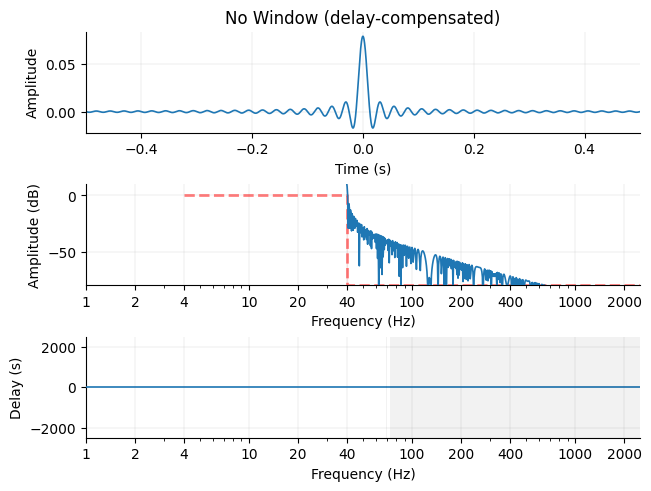

In [62]:
import numpy as np
import pandas as pd
from mne.viz import plot_filter
import matplotlib.pyplot as plt


# Parameters for filter visualization
sfreq = 5000  # Sampling frequency (this should be adapted based on your data)
f_p = 40.  # Pass-band frequency in Hz
nyq = sfreq / 2.  # Nyquist frequency
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

# Filter configuration
n = int(round(1 * sfreq))  # Filter length
n -= n % 2 - 1  # Ensure it's an odd number
t = np.arange(-(n // 2), n // 2 + 1) / sfreq  # Create time array for sinc function
h = np.sinc(2 * f_p * t) / (4 * np.pi)  # Sinc filter

# Frequency limits for plot
flim = (1., sfreq / 2.)

# Plot the filter
fig = plot_filter(h, sfreq, freq, gain, 'No Window', flim=flim, compensate=True)

# Text box with filter details
textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Add text box to the plot
fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

# Display the plot
plt.show()

# Save the figure
fig.savefig('ringing_40hz.png')

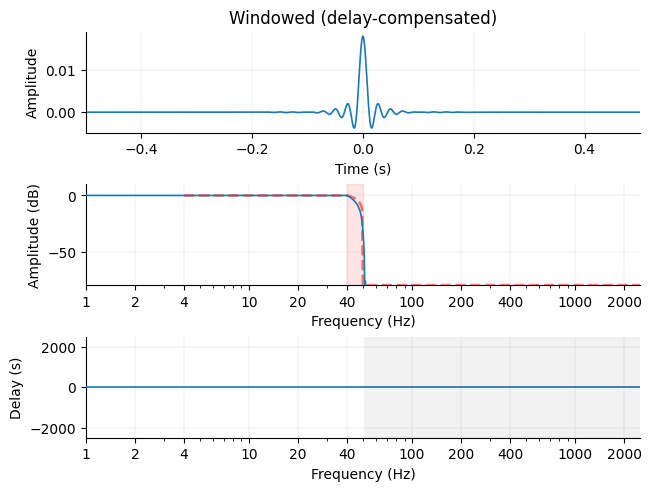

In [63]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, nyq=nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

### **Feature Engineering**

# **Fourier Transform**

In [ ]:
from scipy.signal import welch
sample_rate = 173.61 # in hz

# specify the lowest frequency your interested in
low = 8

# this is the window size and ensures there are at least 2 cycles
# of the lowest frequency in the window
nperseg = (2 / low)*sample_rate

# Compute the periodogram (Welch)
freqs, psd = welch(baseline_df,
                   sample_rate,
                   nperseg=nperseg,
                   scaling='density',
                   axis=0)

# put into a df
psd = pd.DataFrame(psd, index = freqs, columns = baseline_df.columns)

print(color.BOLD+'Welch Output'+color.END)
psd.index.name = 'Hz'
psd.columns = [f'Power_{i}' for i in range(len(psd.columns))]
display(psd)

Welch Output


Power_0   Power_1   Power_2   Power_3   Power_4   Power_5  \
Hz                                                                      
0.000000   0.181309  0.119879  0.134607  0.116957  0.084876  0.063053   
4.037442   1.827443  1.190022  1.344059  1.074878  0.716377  0.659782   
8.074884   0.291656  0.204368  0.203105  0.176835  0.141046  0.124640   
12.112326  0.064408  0.046743  0.054004  0.048823  0.048280  0.046341   
16.149767  0.044430  0.034643  0.039799  0.036968  0.036270  0.033728   
20.187209  0.028649  0.032485  0.036537  0.028602  0.027976  0.030449   
24.224651  0.023304  0.025094  0.036082  0.023277  0.023062  0.025316   
28.262093  0.019687  0.024710  0.029707  0.021500  0.023373  0.022394   
32.299535  0.025671  0.031651  0.025986  0.019318  0.023554  0.023362   
36.336977  0.019700  0.021713  0.013283  0.008477  0.011520  0.012418   
40.374419  0.001806  0.001999  0.001404  0.001295  0.001532  0.001426   
44.411860  0.000922  0.000931  0.001025  0.000889  0.000969  0.000855   
48.449302  0.000994  0.001017  0.000931  0.000836  0.000964  0.000988   
52.486744  0.000930  0.000991  0.000859  0.000882  0.001013  0.001001   
56.524186  0.000967  0.000975  0.000867  0.000854  0.001032  0.000977   
60.561628  0.001019  0.000979  0.000925  0.000905  0.001059  0.001025   
64.599070  0.001041  0.000861  0.001007  0.001000  0.000902  0.001002   
68.636512  0.000965  0.000952  0.001036  0.001047  0.000901  0.000992   
72.673953  0.000965  0.001004  0.001077  0.000996  0.000924  0.001090   
76.711395  0.000873  0.000973  0.001042  0.001029  0.000951  0.001038   
80.748837  0.000891  0.000918  0.000945  0.001053  0.000971  0.000911   
84.786279  0.000901  0.000957  0.000892  0.000982  0.000911  0.000941   

            Power_6   Power_7   Power_8   Power_9  Power_10  Power_11  \
Hz                                                                      
0.000000   0.068253  0.573317  0.213153  0.185638  0.192535  0.129614   
4.037442   0.716850  3.429311  1.602364  1.598070  1.562508  1.048600   
8.074884   0.135196  0.855173  0.277380  0.249839  0.242734  0.184700   
12.112326  0.050252  0.197393  0.071191  0.071096  0.055954  0.059810   
16.149767  0.038407  0.074338  0.040923  0.042096  0.038422  0.036996   
20.187209  0.034667  0.057953  0.028115  0.029979  0.029223  0.025634   
24.224651  0.031175  0.046016  0.025881  0.026157  0.021333  0.022559   
28.262093  0.029601  0.038731  0.023655  0.023045  0.022863  0.021133   
32.299535  0.027658  0.036676  0.024519  0.026937  0.027178  0.025856   
36.336977  0.015691  0.016989  0.014682  0.018807  0.017374  0.017014   
40.374419  0.001613  0.001729  0.001525  0.001793  0.002018  0.001764   
44.411860  0.000989  0.000949  0.001004  0.000959  0.000985  0.000871   
48.449302  0.001012  0.000974  0.000966  0.001044  0.000963  0.000912   
52.486744  0.000957  0.000990  0.000949  0.001060  0.000873  0.000944   
56.524186  0.000938  0.000924  0.000958  0.000889  0.000948  0.000984   
60.561628  0.001013  0.000882  0.000974  0.000944  0.001098  0.001082   
64.599070  0.000990  0.000842  0.000887  0.000943  0.001014  0.001044   
68.636512  0.001002  0.000971  0.000825  0.000977  0.000925  0.000984   
72.673953  0.000988  0.000925  0.000822  0.000923  0.000805  0.000909   
76.711395  0.001003  0.001010  0.000873  0.000904  0.000883  0.000919   
80.748837  0.001003  0.000930  0.000914  0.000954  0.000976  0.001074   
84.786279  0.000998  0.000867  0.000871  0.000915  0.000862  0.001059   

           Power_12  Power_13  Power_14  Power_15  
Hz                                                 
0.000000   0.084964  0.067742  0.069590  0.133269  
4.037442   0.705781  0.585809  0.705860  1.216339  
8.074884   0.149415  0.128870  0.144872  0.211573  
12.112326  0.050714  0.054897  0.062859  0.057898  
16.149767  0.035968  0.036326  0.046903  0.037638  
20.187209  0.027316  0.030313  0.035797  0.031293  
24.224651  0.023600  0.025202  0.034395  0.023431  
28.262093  0.020885  0.024130  0.02816

In [ ]:
import numpy as np

# specify the higest frequency your interested in
high = 12

# Find closest indices of band in frequency vector
idx_min = np.argmax(np.round(freqs) > low) - 1
idx_max = np.argmax(np.round(freqs) > high)

# select frequencies of interest
psd = psd.iloc[idx_min:idx_max,:]

# get the mean of each channel over all frequencies in the band
psd = psd.mean()

print(color.BOLD+'\nMean Frequency Band'+color.END)
display(psd)


Mean Frequency Band


Power_0     0.178032
Power_1     0.125556
Power_2     0.128554
Power_3     0.112829
Power_4     0.094663
Power_5     0.085490
Power_6     0.092724
Power_7     0.526283
Power_8     0.174285
Power_9     0.160468
Power_10    0.149344
Power_11    0.122255
Power_12    0.100065
Power_13    0.091883
Power_14    0.103866
Power_15    0.134735
dtype: float64

In [ ]:
%%time
from scipy.signal import welch
import numpy as np

def bandpower(data, sf, band, output = False):
    band = np.asarray(band)
    low, high = band

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       nperseg=(2 / low)*sf,
                       scaling='density',
                       axis=0)

    # put into a df
    psd = pd.DataFrame(psd, index = freqs, columns = data.columns)

    if output:
        print(color.BOLD+'Welch Output'+color.END)
        psd.index.name = 'Hz'
        psd.columns = ['Power']
        display(psd)

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)

    # select frequencies of interest
    psd = psd.iloc[idx_min:idx_max,:]

    # get the mean of each channel over all frequencies in the band
    psd = psd.mean()

    if output:
        print(color.BOLD+'\nMean Frequency Band'+color.END)
        display(psd)

    return psd

baseline_power = bandpower(baseline_df, 5000, [8,12], output=False)

CPU times: user 8.16 ms, sys: 0 ns, total: 8.16 ms
Wall time: 23 ms


In [ ]:
import pandas as pd
from scipy.signal import welch
import numpy as np

sample_rate = 5000  # in Hz

def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       nperseg=int(np.ceil((2 / low) * sf)),
                       scaling='density',
                       axis=0)

    # Select frequencies of interest
    idx_min = np.argmax(freqs >= low) - 1
    idx_max = np.argmax(freqs > high)

    # Select the PSD values in the specified band
    psd_band = psd[idx_min:idx_max, :]

    # Get the mean power for each channel in the specified band
    mean_power = psd_band.mean(axis=0)

    return mean_power

def power_measures(data):
    bandpasses = [[[0.1, 4], 'power_delta'],
                  [[4, 8], 'power_theta'],
                  [[8, 12], 'power_alpha'],
                  [[12, 30], 'power_beta'],
                  [[30, 70], 'power_gamma']]

    welch_df = pd.DataFrame()
    for bandpass, freq_name in bandpasses:
        bandpass_data = bandpower(data, sample_rate, bandpass)
        # Convert bandpass_data to a Series and then rename it
        bandpass_data = pd.Series(bandpass_data, index=data.columns).rename(freq_name)

        if welch_df.empty:
            welch_df = pd.DataFrame(bandpass_data).T  # Transpose to have features as rows
        else:
            welch_df = pd.concat([welch_df, pd.DataFrame(bandpass_data).T], axis=0) # Concatenate along rows

    return welch_df

# Calculate mean power for baseline and seizure
baseline_power = power_measures(baseline_df)
seizure_power = power_measures(seizure_df)

# Display results
print(color.BOLD + color.UNDERLINE + 'Baseline Mean Power' + color.END)
print(baseline_power)
print()
print(color.BOLD + color.UNDERLINE + 'Seizure Mean Power' + color.END)
print(seizure_power)

# Combine baseline_power and seizure_power DataFrames
combined_power = pd.concat([baseline_power, seizure_power], keys=['Baseline', 'Seizure']) #This line is added to define combined_power

combined_power.to_csv('combined_patient1_power_measures.csv')

Baseline Mean Power
               LMacro_01  LMacro_02   LMacro_03   LMacro_04  LMacro_05  \
power_delta  1578.921499  98.012707  204.884725  166.582911  54.173477   
power_theta   304.928965  40.260357   59.139899   45.191044  18.518425   
power_alpha   111.327394  26.475054   28.880258   23.369444  12.357080   
power_beta     11.833794   7.395503    8.191387    6.032199   3.140253   
power_gamma     1.241642   0.850714    0.992942    0.763526   0.477543   

             LMacro_06  LMacro_07   LMacro_08   RMacro_01  RMacro_02  \
power_delta  50.661203  71.427309  305.519711  105.232641  59.858408   
power_theta  23.925922  24.229790   75.625524  118.390507  60.500009   
power_alpha  15.491780  16.898014   35.785360   59.178250  32.908850   
power_beta    4.390124   5.155225   14.246443    3.082503   5.931159   
power_gamma   0.513083   0.588664    1.865990    0.652721   0.877066   

              RMacro_03  RMacro_04  RMacro_05  RMacro_06   RMacro_07  \
power_delta  148.242828  90.73

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


In [ ]:
%%time
def power_measure_channels(data, freq, output=False):

  welch_df = pd.DataFrame()
  for channel_name in data:
    channel_df = pd.DataFrame(power_measures(pd.DataFrame(data[channel_name])))
    channel_df['channel'] = channel_name
    channel_df.index.name = 'feature'
    channel_df = channel_df.set_index('channel', append=True)
    channel_df = channel_df.swaplevel()

    if welch_df.empty:
        welch_df = channel_df
    else:
        welch_df = pd.concat([welch_df, channel_df])

  welch_df = welch_df.T

  if output:
    display(welch_df.head())

  return welch_df

example_power_measure = power_measure_channels(seizure_df,
                                               100000,
                                               output=True)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectr

channel     LMacro_01                                                  \
feature   power_delta power_theta power_alpha  power_beta power_gamma   
LMacro_01  382.678719  432.016375  324.810667  196.337068   37.985721   
LMacro_02         NaN         NaN         NaN         NaN         NaN   
LMacro_03         NaN         NaN         NaN         NaN         NaN   
LMacro_04         NaN         NaN         NaN         NaN         NaN   
LMacro_05         NaN         NaN         NaN         NaN         NaN   

channel     LMacro_02                                                  ...  \
feature   power_delta power_theta power_alpha  power_beta power_gamma  ...   
LMacro_01         NaN         NaN         NaN         NaN         NaN  ...   
LMacro_02  122.424063   74.048838   89.794948  119.704097   19.645515  ...   
LMacro_03         NaN         NaN         NaN         NaN         NaN  ...   
LMacro_04         NaN         NaN         NaN         NaN         NaN  ...   
LMacro_05         NaN         NaN         NaN         NaN         NaN  ...   

channel     RMacro_07                                                 \
feature   power_delta power_theta power_alpha power_beta power_gamma   
LMacro_01         NaN         NaN         NaN        NaN         NaN   
LMacro_02         NaN         NaN         NaN        NaN         NaN   
LMacro_03         NaN         NaN         NaN        NaN         NaN   
LMacro_04         NaN         NaN         NaN        NaN         NaN   
LMacro_05         NaN         NaN         NaN        NaN         NaN   

channel     RMacro_08                                                 
feature   power_delta power_theta power_alpha power_beta power_gamma  
LMacro_01         NaN         NaN         NaN        NaN         NaN  
LMacro_02         NaN         NaN         NaN        NaN         NaN  
LMacro_03         NaN         NaN         NaN        NaN         NaN  
LMacro_04         NaN         NaN         NaN        NaN         NaN  
LMacro_05         NaN         NaN         NaN        NaN         NaN  

[5 rows x 80 columns]

CPU times: user 338 ms, sys: 381 µs, total: 338 ms
Wall time: 372 ms


**Continuous Wavelet Transform**

In [ ]:
from pywt import families

families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [ ]:
from pywt import Wavelet

wavelet = Wavelet('Haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


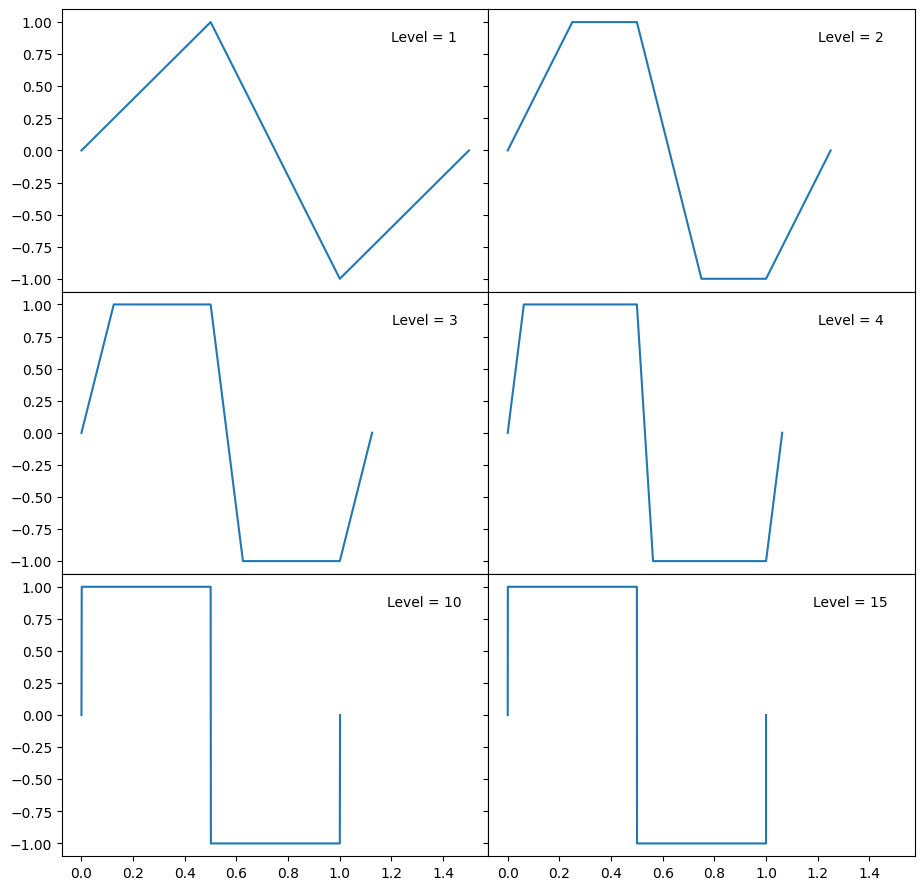

In [ ]:
import matplotlib.pyplot as plt

def plot_wavelet(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for i, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[i].plot(x, psi)
        axs[i].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[i].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

plot_wavelet(wavelet)

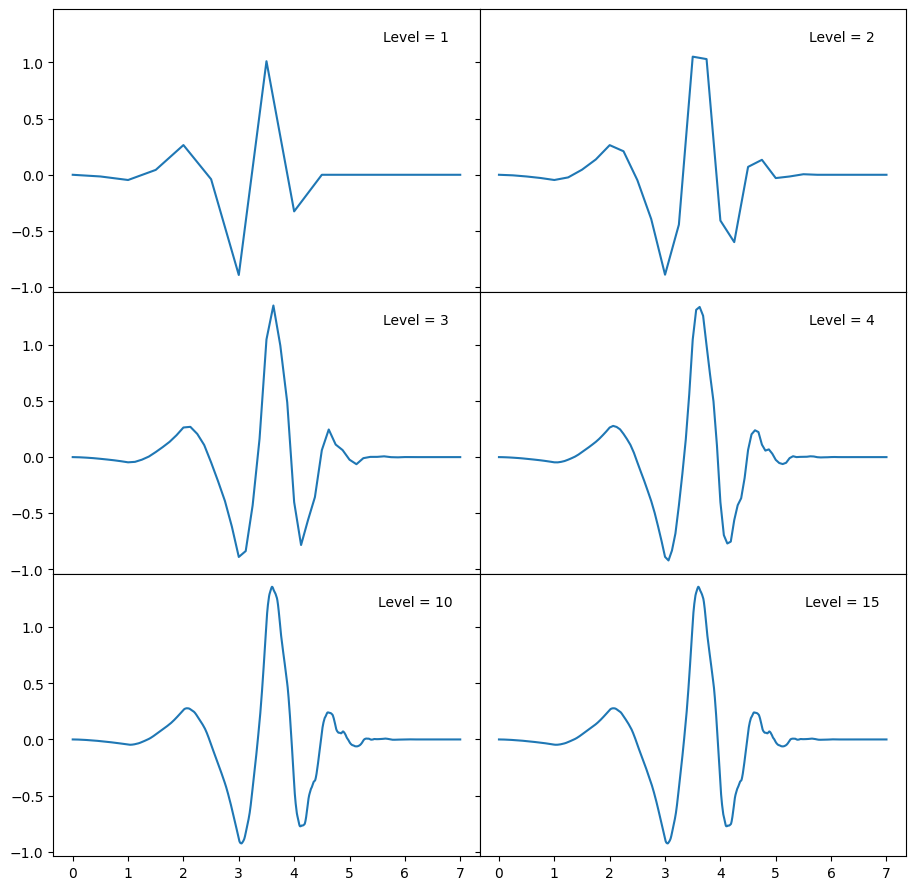

In [ ]:
plot_wavelet(Wavelet('db4'))

In [ ]:
import numpy as np
import pandas as pd
from pywt import wavedec

# Step 1: Inspect the DataFrame for non-numeric columns
print("Columns in the DataFrame:", baseline_df.columns)

# Step 2: Drop non-numeric columns (e.g., metadata or labels)
# This assumes that all non-numeric columns are irrelevant for wavelet transformation
numeric_df = baseline_df.select_dtypes(include=[np.number])

print("Shape after dropping non-numeric columns:", numeric_df.shape)

# Step 3: Transpose the data to get time-series format (time points should be columns)
data_t = numeric_df.transpose()

# Step 4: Perform wavelet decomposition on numeric data
level = 6  # Number of decomposition levels
coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

# Output the type of coeffs_list and the first array of coefficients
print(type(coeffs_list))

# Display the first array of coefficients
print("\nExample first array of wavelet coefficients:")
print(coeffs_list[0])

Columns in the DataFrame: Index(['LMacro_01', 'LMacro_02', 'LMacro_03', 'LMacro_04', 'LMacro_05',
       'LMacro_06', 'LMacro_07', 'LMacro_08', 'RMacro_01', 'RMacro_02',
       'RMacro_03', 'RMacro_04', 'RMacro_05', 'RMacro_06', 'RMacro_07',
       'RMacro_08'],
      dtype='object')
Shape after dropping non-numeric columns: (5000, 16)
<class 'list'>

Example first array of wavelet coefficients:
[[  631.81174729   630.92074308   631.1326659  ... -1010.45755657
   -977.44682753  -963.51206126]
 [ -299.24691003  -299.37257224  -299.29961289 ...  -443.84261265
   -394.04341899  -370.31021643]
 [ -313.91678164  -313.62393899  -313.16481931 ...  -459.53975283
   -369.08579482  -338.37156044]
 ...
 [  -89.21464      -90.09347737   -89.55805551 ...  -617.94945637
   -533.76788144  -504.91525106]
 [ -514.52900489  -515.73021976  -515.45984329 ...  -479.39619638
   -434.40741014  -414.91321547]
 [ -151.12417424  -152.01732176  -151.82534569 ...  -850.85274988
   -779.55969684  -748.4640068 ]]


In [ ]:
# make a list of the component names (later column rows)
nums = list(range(1,level+1))
names=[]
for num in nums:
    names.append('D' + str(num))
names.append('A' + str(nums[-1]))

# reverse the names so it counts down
names = names[::-1]

names

['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']

In [ ]:
# make an empty dataframe
wavelets = pd.DataFrame()

# for each array in the list of arrays
for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array).T
    # name the column the appropriate level name
    level_df.columns = [names[i]] * level_df.shape[1] #  create a list with the same name repeated for the number of columns
    # if the wavelets df is empty...
    if wavelets.empty:
        # ... make the first level df the wavelets df
        wavelets = level_df
    # ..otherwise...
    else:
        # ... add the next levels df to another column
        wavelets = pd.concat([wavelets,level_df], axis=1)

wavelets.head()

A6          A6          A6          A6          A6          A6  \
0  631.811747 -299.246910 -313.916782 -377.181371 -187.577611 -129.100731   
1  630.920743 -299.372572 -313.623939 -377.013365 -187.575093 -129.412807   
2  631.132666 -299.299613 -313.164819 -376.847970 -187.149356 -129.100731   
3  632.958392 -298.067149 -313.219206 -377.026947 -188.779079 -129.975611   
4  622.173741 -306.384396 -317.114900 -377.125512 -179.814959 -123.855720   

           A6          A6          A6          A6  ...        D1        D1  \
0 -189.696500 -233.478880  395.724038  606.538558  ...  0.197632 -0.105637   
1 -190.589912 -233.723780  394.411090  607.035214  ...  0.681964  0.040962   
2 -190.149611 -233.547120  394.699772  607.004519  ...  0.202394 -0.017249   
3 -190.109492 -234.578423  394.306841  606.324974  ...  0.431344  0.590106   
4 -188.693980 -227.608408  398.523104  609.132578  ...  0.624893  0.245398   

         D1        D1        D1        D1        D1        D1            D1  \
0 -0.202242  0.140085 -0.184993  0.066717  0.039347  0.230515  4.348041e-02   
1 -0.359064  0.400026 -0.440988  0.240975  0.122886  0.681964  5.551115e-16   
2 -0.161619 -0.340098 -0.055982 -0.107679 -0.885159 -0.512453 -4.844688e-01   
3  0.867433  0.635628 -0.420270  0.077791  0.116372 -0.025141  4.284867e-01   
4 -0.064813  0.001904 -0.618242 -0.213129 -0.243970  0.307692 -1.101973e-01   

         D1  
0  0.200627  
1  0.522913  
2 -0.764502  
3  0.560355  
4  0.391520  

[5 rows x 112 columns]

In [ ]:
# remove the AN levels
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decom_wavelets = wavelets.drop(bad_items, axis=1)

decom_wavelets.head()

D6         D6         D6        D6         D6         D6         D6  \
0   0.026542  -0.040636   0.018371 -0.057565  -0.012993   0.039096   0.042190   
1  -0.119324  -0.194066   0.011376 -0.226309  -0.107259  -0.005016  -0.153093   
2  -5.213490  -1.087769   2.231215  1.128347   1.094197  -1.476326  -5.153656   
3  17.773585  23.079299  18.655561  5.811242 -21.579303 -20.241690 -15.886930   
4  -9.506469  -6.316135 -12.116778  7.845615  23.016398  25.194309  26.225688   

          D6         D6        D6  ...        D1        D1        D1  \
0  -0.174618  -0.073983 -0.099209  ...  0.197632 -0.105637 -0.202242   
1  -0.566669  -0.430003 -0.252902  ...  0.681964  0.040962 -0.359064   
2   0.192440  -5.814361  3.035876  ...  0.202394 -0.017249 -0.161619   
3 -17.234714 -31.630093  0.789199  ...  0.431344  0.590106  0.867433   
4  28.662652  -0.981503 -0.420630  ...  0.624893  0.245398 -0.064813   

         D1        D1        D1        D1        D1            D1        D1  
0  0.140085 -0.184993  0.066717  0.039347  0.230515  4.348041e-02  0.200627  
1  0.400026 -0.440988  0.240975  0.122886  0.681964  5.551115e-16  0.522913  
2 -0.340098 -0.055982 -0.107679 -0.885159 -0.512453 -4.844688e-01 -0.764502  
3  0.635628 -0.420270  0.077791  0.116372 -0.025141  4.284867e-01  0.560355  
4  0.001904 -0.618242 -0.213129 -0.243970  0.307692 -1.101973e-01  0.391520  

[5 rows x 96 columns]

In [ ]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # Select only numeric columns before transpose
  data = data.select_dtypes(include=[np.number]) # This line is added

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets

example_wavelets = wavelet_decompose_channels(seizure_df, level=5, output=True)

channel LMacro_01                                             LMacro_02  \
level          D1        D2         D3         D4          D5        D1   
sample                                                                    
0        0.396507 -3.236972  11.194758  -0.458059   -0.920481 -0.011399   
1        0.968698 -8.870880  35.356568  -3.683040   -5.064200  0.004797   
2       -0.965179  6.834787 -17.343680 -28.350231  -45.380752  0.688565   
3        0.181524 -0.432810   0.728332  37.380978  116.364461 -0.887338   
4        0.342003 -0.207657  -0.206273 -25.991252 -108.913549 -0.270538   

channel                                             ... RMacro_07            \
level          D2         D3         D4         D5  ...        D1        D2   
sample                                              ...                       
0       -2.360153  11.557247  -0.599190  -0.866623  ...  0.639422 -0.679114   
1       -5.999635  36.369329  -4.321810  -5.012190  ...  1.282003 -1.582755   
2        6.560404 -19.479394 -31.400661 -47.564681  ... -0.275561  4.097115   
3        0.059711   2.794239  33.577536  91.555070  ... -0.059162 -0.248824   
4       -0.393996   0.673767 -26.484827 -49.750741  ... -0.602558  1.081456   

channel                                  RMacro_08                       \
level           D3         D4         D5        D1        D2         D3   
sample                                                                    
0         3.148903  -0.231744  -0.357253  0.441790 -0.447398   3.297981   
1        10.068949  -1.122385  -1.146189  0.600039 -0.833184  10.517370   
2        -2.588474  -2.528057  -2.703724 -0.477955  3.857082  -2.616638   
3        -5.418694   1.002048  -4.943635 -0.260128 -2.190204  -5.388046   
4         3.114944 -12.823927  12.753129  0.141989  0.720808   3.843068   

channel                        
level           D4         D5  
sample                         
0        -0.275130  -0.366236  
1        -1.266563  -1.162497  
2        -2.374287  -2.276077  
3         1.049893 -14.510362  
4       -10.987170  13.411365  

[5 rows x 80 columns]

## Log Sum

In [ ]:
import pandas as pd
from pywt import wavedec
import numpy as np

# Function to subtract the smallest value
def minus_small(x):
    '''Takes a pandas series and subtracts the smallest number (other than 0).'''
    no_zeros = x[x != 0]  # Remove zeros
    result = no_zeros - no_zeros.min()  # Subtract the minimum value
    return result

# Function to reformat the DataFrame
def reformat(data, feature_name):
    data.index = [feature_name + level for level in data.index]
    data.index.name = 'feature'
    data = pd.DataFrame(data.unstack()).T
    return data

# Function to calculate log of sum per channel
def log_sum_channels(data, output=False):
    # Calculate the absolute sum for each channel
    absolute_sums = data.sum()

    # Unstack the DataFrame to make channels the columns
    absolute_sums = absolute_sums.unstack('channel')

    # Apply minus_small to each channel
    absolute_sums_minus = absolute_sums.apply(minus_small)

    # Apply log transformation to each channel
    absolute_sums_log = absolute_sums_minus.apply(np.log)

    # Reformat the DataFrame
    absolute_sums_log = reformat(absolute_sums_log, 'LSWT_')

    if output:
        display(absolute_sums_log.head())  # Optionally display the result

    return absolute_sums_log

# Assuming 'example_wavelets' is already defined from previous code
# Apply the log_sum_channels function to wavelet data
example_absolute_sums_log = log_sum_channels(example_wavelets, output=True)

print("Patient1.csv has been updated successfully!")

channel LMacro_01                                       LMacro_02            \
feature   LSWT_D1   LSWT_D2   LSWT_D3   LSWT_D4 LSWT_D5   LSWT_D1   LSWT_D2   
0        4.949442  4.906854  4.594612  5.503116    -inf  3.663372  4.208758   

channel                              ... RMacro_07                    \
feature   LSWT_D3   LSWT_D4 LSWT_D5  ...   LSWT_D1   LSWT_D2 LSWT_D3   
0        3.049835  5.355094    -inf  ...  3.646556  3.171315    -inf   

channel                     RMacro_08                                        
feature   LSWT_D4   LSWT_D5   LSWT_D1   LSWT_D2 LSWT_D3   LSWT_D4   LSWT_D5  
0        5.244895  4.477367  4.005556  4.401302    -inf  5.337417  4.402701  

[1 rows x 80 columns]

Patient1.csv has been updated successfully!


Average power of the wavelet coefficients in each sub-band

In [ ]:
from pywt import wavedec

def ave(data, output=False):
    # get the mean
    mean_data = data.mean()

    # Convert the MultiIndex to a simple Index before adding '_mean'
    mean_data.index = [str(level) + '_mean' for level in mean_data.index]

    if output:
        display(mean_data)

    return mean_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Wavelets'+color.END)
baseline_mean = ave(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Wavelets'+color.END)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5)

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Wavelets


('LMacro_01', 'D1')_mean   -0.007707
('LMacro_01', 'D2')_mean   -0.024667
('LMacro_01', 'D3')_mean   -0.162905
('LMacro_01', 'D4')_mean    0.584580
('LMacro_01', 'D5')_mean   -1.794687
                              ...   
('RMacro_08', 'D1')_mean    0.002715
('RMacro_08', 'D2')_mean    0.047709
('RMacro_08', 'D3')_mean   -0.161951
('RMacro_08', 'D4')_mean    0.965892
('RMacro_08', 'D5')_mean    0.359177
Length: 80, dtype: float64


Seizure Mean Wavelets


('LMacro_01', 'D1')_mean   -0.007707
('LMacro_01', 'D2')_mean   -0.024667
('LMacro_01', 'D3')_mean   -0.162905
('LMacro_01', 'D4')_mean    0.584580
('LMacro_01', 'D5')_mean   -1.794687
                              ...   
('RMacro_08', 'D1')_mean    0.002715
('RMacro_08', 'D2')_mean    0.047709
('RMacro_08', 'D3')_mean   -0.161951
('RMacro_08', 'D4')_mean    0.965892
('RMacro_08', 'D5')_mean    0.359177
Length: 80, dtype: float64

In [ ]:
import pandas as pd

# Assuming minus_small and reformat functions are already defined

# Function to calculate mean across channels
def ave_channels(data, output=False):
    # Get the mean for each channel
    mean_data = data.mean()

    # Reshape data to have channels as columns
    mean_data = mean_data.unstack('channel')

    # Reformat the DataFrame for saving
    mean_data = reformat(mean_data, 'Mean_')

    # Display the result if output is True
    if output:
        display(mean_data.head())

    return mean_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call ave_channels to compute the mean wavelets across channels
example_wavelet_mean = ave_channels(example_wavelets, output=True)

channel LMacro_01                                        LMacro_02            \
feature   Mean_D1   Mean_D2   Mean_D3  Mean_D4   Mean_D5   Mean_D1   Mean_D2   
0       -0.007707 -0.024667 -0.162905  0.58458 -1.794687  -0.00981  0.025379   

channel                                ... RMacro_07                      \
feature   Mean_D3   Mean_D4   Mean_D5  ...   Mean_D1   Mean_D2   Mean_D3   
0       -0.094882  0.990121 -0.610527  ... -0.009453 -0.041822 -0.157819   

channel                     RMacro_08                                          
feature   Mean_D4   Mean_D5   Mean_D1   Mean_D2   Mean_D3   Mean_D4   Mean_D5  
0        0.860552  0.450192  0.002715  0.047709 -0.161951  0.965892  0.359177  

[1 rows x 80 columns]

Mean of the absolute values of the coefficients in each sub-band

In [ ]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_mean_abs' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5) #

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


('LMacro_01', 'D1')_mean_abs     0.844344
('LMacro_01', 'D2')_mean_abs     1.841227
('LMacro_01', 'D3')_mean_abs     4.155438
('LMacro_01', 'D4')_mean_abs    11.288221
('LMacro_01', 'D5')_mean_abs    73.617494
                                  ...    
('RMacro_08', 'D1')_mean_abs     0.815891
('RMacro_08', 'D2')_mean_abs     1.581290
('RMacro_08', 'D3')_mean_abs     3.358858
('RMacro_08', 'D4')_mean_abs     5.676737
('RMacro_08', 'D5')_mean_abs    11.404743
Length: 80, dtype: float64


Seizure Mean Absolute Wavelets


('LMacro_01', 'D1')_mean_abs     0.844344
('LMacro_01', 'D2')_mean_abs     1.841227
('LMacro_01', 'D3')_mean_abs     4.155438
('LMacro_01', 'D4')_mean_abs    11.288221
('LMacro_01', 'D5')_mean_abs    73.617494
                                  ...    
('RMacro_08', 'D1')_mean_abs     0.815891
('RMacro_08', 'D2')_mean_abs     1.581290
('RMacro_08', 'D3')_mean_abs     3.358858
('RMacro_08', 'D4')_mean_abs     5.676737
('RMacro_08', 'D5')_mean_abs    11.404743
Length: 80, dtype: float64

('LMacro_01', 'D1')_mean   -0.007707
('LMacro_01', 'D2')_mean   -0.024667
('LMacro_01', 'D3')_mean   -0.162905
('LMacro_01', 'D4')_mean    0.584580
('LMacro_01', 'D5')_mean   -1.794687
                              ...   
('RMacro_08', 'D1')_mean    0.002715
('RMacro_08', 'D2')_mean    0.047709
('RMacro_08', 'D3')_mean   -0.161951
('RMacro_08', 'D4')_mean    0.965892
('RMacro_08', 'D5')_mean    0.359177
Length: 80, dtype: float64

In [ ]:
import pandas as pd

# Function to calculate mean of the absolute values across channels
def mean_abs_channels(data, output=False):
    # Get the mean of absolute values for each channel
    mean_abs_data = data.abs().mean()

    # Reshape data to have channels as columns
    mean_abs_data = mean_abs_data.unstack('channel')

    # Reformat the DataFrame for saving
    mean_abs_data = reformat(mean_abs_data, 'Mean_Abs_')

    # Display the result if output is True
    if output:
        display(mean_abs_data.head())

    return mean_abs_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call mean_abs_channels to compute the mean absolute wavelets across channels
example_mean_abs = mean_abs_channels(example_wavelets, output=True)

channel   LMacro_01                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          0.844344    1.841227    4.155438   11.288221   73.617494   

channel   LMacro_02                                                  ...  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  ...   
0          0.901721    1.840699    4.227797    11.81398   45.310454  ...   

channel   RMacro_07                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          0.905356    1.755426    3.343986    5.532801   10.345108   

channel   RMacro_08                                                  
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  
0          0.815891     1.58129    3.358858    5.676737   11.404743  

[1 rows x 80 columns]

Standard deviation of the coefficients in each sub-band

In [ ]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_std' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


('LMacro_01', 'D1')_std     0.844344
('LMacro_01', 'D2')_std     1.841227
('LMacro_01', 'D3')_std     4.155438
('LMacro_01', 'D4')_std    11.288221
('LMacro_01', 'D5')_std    73.617494
                             ...    
('RMacro_08', 'D1')_std     0.815891
('RMacro_08', 'D2')_std     1.581290
('RMacro_08', 'D3')_std     3.358858
('RMacro_08', 'D4')_std     5.676737
('RMacro_08', 'D5')_std    11.404743
Length: 80, dtype: float64


Seizure Mean Absolute Wavelets


('LMacro_01', 'D1')_std     0.844344
('LMacro_01', 'D2')_std     1.841227
('LMacro_01', 'D3')_std     4.155438
('LMacro_01', 'D4')_std    11.288221
('LMacro_01', 'D5')_std    73.617494
                             ...    
('RMacro_08', 'D1')_std     0.815891
('RMacro_08', 'D2')_std     1.581290
('RMacro_08', 'D3')_std     3.358858
('RMacro_08', 'D4')_std     5.676737
('RMacro_08', 'D5')_std    11.404743
Length: 80, dtype: float64

('LMacro_01', 'D1')_mean   -0.007707
('LMacro_01', 'D2')_mean   -0.024667
('LMacro_01', 'D3')_mean   -0.162905
('LMacro_01', 'D4')_mean    0.584580
('LMacro_01', 'D5')_mean   -1.794687
                              ...   
('RMacro_08', 'D1')_mean    0.002715
('RMacro_08', 'D2')_mean    0.047709
('RMacro_08', 'D3')_mean   -0.161951
('RMacro_08', 'D4')_mean    0.965892
('RMacro_08', 'D5')_mean    0.359177
Length: 80, dtype: float64

In [ ]:
import pandas as pd

# Function to calculate the standard deviation of wavelet coefficients across channels
def coeff_std_channels(data, output=False):
    # Get the standard deviation for each channel
    std_data = data.std()

    # Reshape data to have channels as columns
    std_data = std_data.unstack('channel')

    # Reformat the DataFrame for saving
    std_data = reformat(std_data, 'STD_')

    # Display the result if output is True
    if output:
        display(std_data.head())

    return std_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call coeff_std_channels to compute the standard deviation of wavelets across channels
example_std = coeff_std_channels(example_wavelets, output=True)

channel LMacro_01                                          LMacro_02  \
feature    STD_D1    STD_D2    STD_D3    STD_D4     STD_D5    STD_D1   
0        1.047873  2.355999  5.509443  15.46245  92.122182  1.143894   

channel                                            ... RMacro_07            \
feature    STD_D2    STD_D3     STD_D4     STD_D5  ...    STD_D1    STD_D2   
0        2.338461  5.710597  15.627994  55.809702  ...  1.155157  2.252725   

channel                                RMacro_08                      \
feature    STD_D3    STD_D4     STD_D5    STD_D1    STD_D2    STD_D3   
0        4.445884  7.196825  14.299178  1.043908  2.094122  4.415351   

channel                       
feature    STD_D4     STD_D5  
0        7.295452  15.652416  

[1 rows x 80 columns]

Ratio of the absolute mean values of adjacent sub-bands

In [ ]:
def ratio(data, output=False):
    # get the mean of the absolute values
    data = data.abs().mean()
    # get a list of the index
    decimation_levels = list(data.index)

    ratio_data=pd.Series(index=data.index)
    for level_no in range(0, len(decimation_levels)):
        # for the first decimation
        if level_no == 0:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no+1]]

        #for the last decimation
        elif level_no == len(decimation_levels)-1:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no-1]]
        else:
            before = data.loc[decimation_levels[level_no-1]]
            after = data.loc[decimation_levels[level_no+1]]
            mean_data = (before+after)/2

            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/mean_data

    ratio_data.index = [str(level) + '_Ratio' for level in ratio_data.index]

    if output:
        display(ratio_data)

    return ratio_data


print(color.BOLD+color.UNDERLINE+'Baseline Ratio Wavelets'+color.END)
baseline_ratio = ratio(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Ratio Wavelets'+color.END)
seizure_ratio = ratio(seizure_wavelets, output=True)


Baseline Ratio Wavelets


('LMacro_01', 'D1')_Ratio     0.458577
('LMacro_01', 'D2')_Ratio     0.736523
('LMacro_01', 'D3')_Ratio     0.632995
('LMacro_01', 'D4')_Ratio     0.290287
('LMacro_01', 'D5')_Ratio    12.078399
                               ...    
('RMacro_08', 'D1')_Ratio     0.136821
('RMacro_08', 'D2')_Ratio     0.757550
('RMacro_08', 'D3')_Ratio     0.925557
('RMacro_08', 'D4')_Ratio     0.769018
('RMacro_08', 'D5')_Ratio     2.009031
Length: 80, dtype: float64


Seizure Ratio Wavelets


('LMacro_01', 'D1')_Ratio     0.458577
('LMacro_01', 'D2')_Ratio     0.736523
('LMacro_01', 'D3')_Ratio     0.632995
('LMacro_01', 'D4')_Ratio     0.290287
('LMacro_01', 'D5')_Ratio    12.078399
                               ...    
('RMacro_08', 'D1')_Ratio     0.136821
('RMacro_08', 'D2')_Ratio     0.757550
('RMacro_08', 'D3')_Ratio     0.925557
('RMacro_08', 'D4')_Ratio     0.769018
('RMacro_08', 'D5')_Ratio     2.009031
Length: 80, dtype: float64

In [ ]:
import pandas as pd

def ratio_channels(epoch_data):
    # Get decimation levels (wavelet decomposition levels)
    decimation_levels = list(epoch_data.index)

    # Initialize an empty Series to store the ratio data
    ratio_data = pd.Series()

    # Iterate through each decimation level
    for level_no in range(0, len(decimation_levels)):
        # For the first decimation level, take the ratio with the next level
        if level_no == 0:
            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / epoch_data.loc[decimation_levels[level_no + 1]]
        # For the last decimation level, take the ratio with the previous level
        elif level_no == len(decimation_levels) - 1:
            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / epoch_data.loc[decimation_levels[level_no - 1]]
        # For all intermediate decimation levels, take the ratio with the average of previous and next levels
        else:
            before = epoch_data.loc[decimation_levels[level_no - 1]]
            after = epoch_data.loc[decimation_levels[level_no + 1]]
            mean_data = (before + after) / 2

            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / mean_data

    # Name the index column as 'features'
    ratio_data.index.name = 'features'

    return ratio_data

# Assuming `example_wavelets` contains the wavelet coefficient data

# Calculate the ratio of adjacent wavelet decimation levels for each channel
example_ratio_data = example_wavelets.mean().unstack('channel').apply(ratio_channels)

# Reformat the result to add 'Ratio_Mean_' prefix for easy identification of features
example_ratio_data = reformat(example_ratio_data, 'Ratio_Mean_')

# Display the head of the ratio data to check the result
display(example_ratio_data.head())

channel     LMacro_01                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0            0.312456      0.289161     -0.581896     -0.597243     -3.070047   

channel     LMacro_02                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0           -0.386534     -0.484831     -0.186867     -2.807224     -0.616619   

channel  ...     RMacro_07                                            \
feature  ... Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0        ...      0.226022      0.500045     -0.385522      5.886679   

channel                   RMacro_08                                            \
feature Ratio_Mean_D5 Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0            0.523143      0.056911     -0.599227     -0.319555      9.794741   

channel                
feature Ratio_Mean_D5  
0            0.371861  

[1 rows x 80 columns]

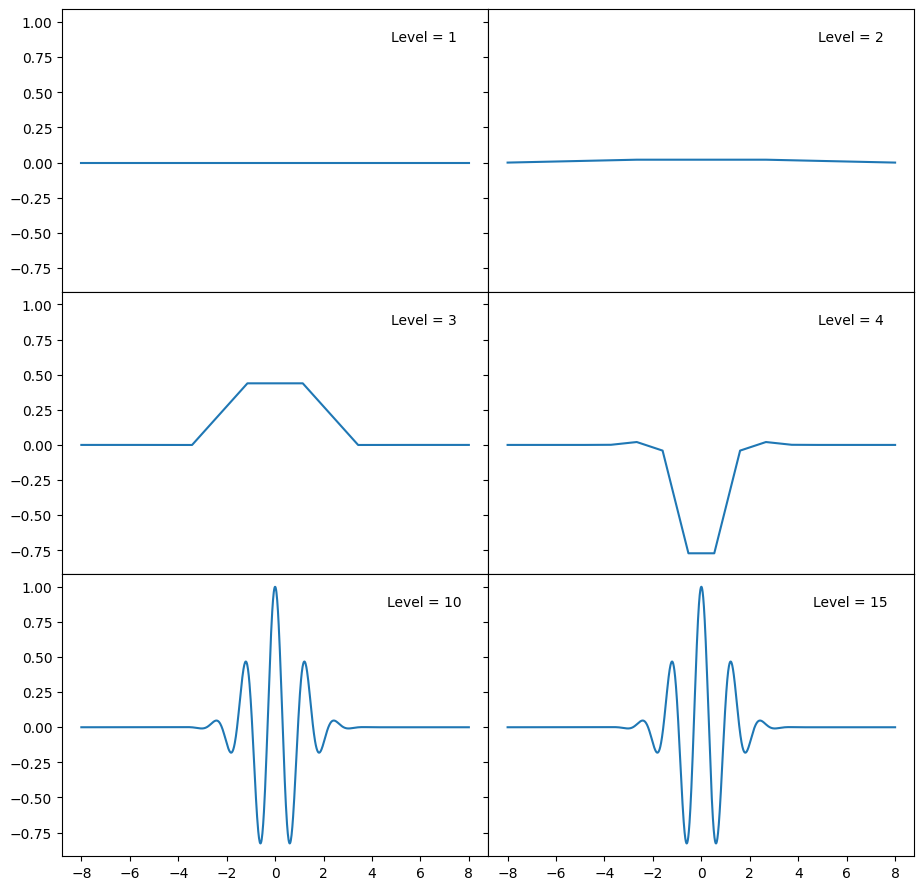

In [ ]:
from pywt import ContinuousWavelet

plot_wavelet(ContinuousWavelet('morl'))

In [ ]:
from pywt import scale2frequency, cwt

def cwt_wavelet_decompose(data, freq, waveletname, output=False):

    scales = np.arange(0.25, (freq/20)+0.25, 0.1)
    frequencies = scale2frequency(waveletname, scales) / (freq*0.0001)  # 100 Hz sampling is 0.01

    # transpose the data
    data_t = data.transpose()

    # get the wavelet coefficients at each level in a list
    coeffs_list = cwt(data_t.values, scales, waveletname)

    decom_wavelets = pd.DataFrame(coeffs_list[0][:,0,:], index =np.round(frequencies, 2)).T

    if output:
        display(decom_wavelets.head())

    return decom_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Wavelets'+color.END)
baseline_wavelets = cwt_wavelet_decompose(baseline_df, 5000, 'morl', output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Wavelets'+color.END)
seizure_wavelets = cwt_wavelet_decompose(seizure_df, 5000, 'morl',  output=True)

Baseline Wavelets


6.50      4.64      3.61      2.95       2.50      2.17      1.91  \
0 -0.000199 -0.671361  0.437605 -2.648191  12.520131 -0.006183 -9.421545   
1  0.000916 -0.008098 -0.011022 -0.162669   1.366685  0.457462 -1.068047   
2  0.000016 -0.000198  0.000400  0.000734  -0.001193  0.081383  0.009500   
3  0.000012  0.038187 -0.083874 -0.073283  -0.029659  0.007134  0.139830   
4 -0.000019 -0.029712  0.078100  0.104305  -0.134657 -0.007097 -0.079601   

       1.71       1.55       1.41  ...       0.01       0.01       0.01  \
0  1.775553  15.112983  12.683441  ... -34.483583 -34.590474 -34.832750   
1  3.489457   0.730072  -9.245790  ... -33.801897 -33.644256 -33.823029   
2  0.270873  -1.030780   0.653443  ... -12.481884 -31.276584 -32.033883   
3  0.122230   0.013177   0.157676  ... -11.219768 -11.812082 -12.203242   
4 -0.234743  -0.305672  -0.199393  ...  -9.757863 -10.839209 -10.730219   

        0.01       0.01       0.01       0.01       0.01       0.01       0.01  
0 -34.034935 -34.208338 -33.986903 -34.315608 -34.276441 -33.436843 -33.368018  
1 -32.004573 -32.553584 -32.933769 -33.378672 -33.197759 -31.806615 -32.155301  
2 -11.875221 -12.114843 -11.913704 -31.307864 -31.678920 -11.618852 -12.358719  
3 -10.994813 -11.407594 -11.083369 -11.554624 -11.601579 -10.486026 -11.277041  
4  -9.874590  -9.603141  -9.812842  -9.996630 -10.269270  -9.362549  -9.225101  

[5 rows x 2500 columns]


Seizure Wavelets


6.50      4.64      3.61      2.95       2.50      2.17       1.91  \
0  0.000156  0.662452 -0.186732  3.537456 -15.227347 -0.022335  10.709341   
1 -0.001216 -0.175549  0.363156  0.330337  -0.898341 -0.588849   0.015350   
2 -0.000058 -0.183648  0.348047  0.133405   0.808815 -0.102053  -1.290718   
3 -0.000042 -0.183841  0.348466  0.134293   0.802785 -0.003014  -1.285080   
4 -0.000026 -0.145835  0.265210  0.062889   0.775255  0.005811  -1.116999   

       1.71       1.55       1.41  ...        0.01        0.01        0.01  \
0 -3.050510 -18.977447 -15.626682  ...  203.251431  204.443570  204.759670   
1 -5.009944  -0.533561  11.900024  ...  200.482820  201.188566  201.764017   
2 -0.827089   1.682163  -0.686176  ...  172.708696  197.155949  198.050005   
3 -0.505978   0.345716  -0.129947  ...  169.200708  170.204215  170.684038   
4 -0.345170   0.401281   0.149532  ...  165.107275  165.633168  166.392675   

         0.01        0.01        0.01        0.01        0.01        0.01  \
0  202.380221  201.588816  199.636079  200.816283  200.741651  199.106614   
1  199.031996  198.855221  197.528256  198.489252  198.426328  194.981786   
2  171.439342  171.266600  169.701892  193.907602  194.698755  167.986945   
3  167.258954  167.417530  166.726817  166.431292  167.769555  163.265471   
4  163.309115  163.574195  162.329675  161.688623  163.402202  159.959895   

         0.01  
0  197.998654  
1  195.323100  
2  168.452463  
3  164.420019  
4  160.432525  

[5 rows x 2500 columns]

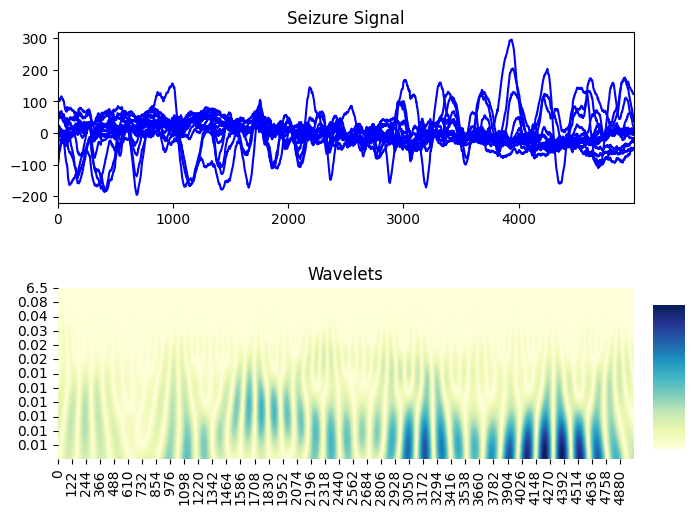

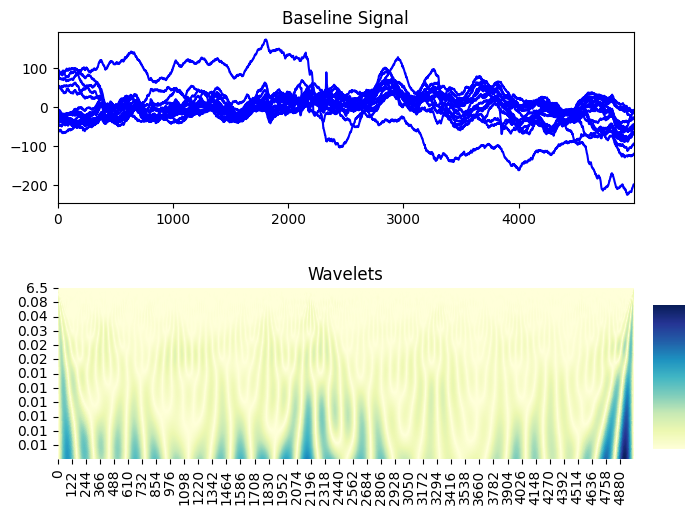

In [ ]:
#!pip install seaborn
import seaborn as sns
import pandas as pd


def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  #The seaborn module was not imported causing the error.
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  plt.show()

plot_cwt_scalogram(seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(baseline_df,
               baseline_wavelets,
               None, 'Baseline')

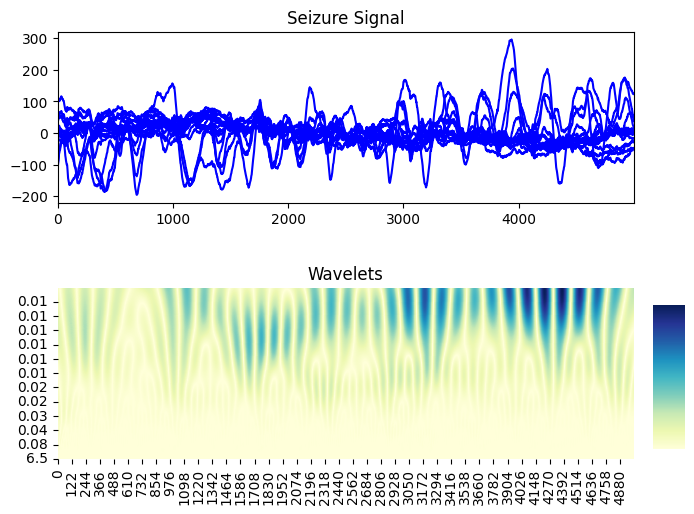

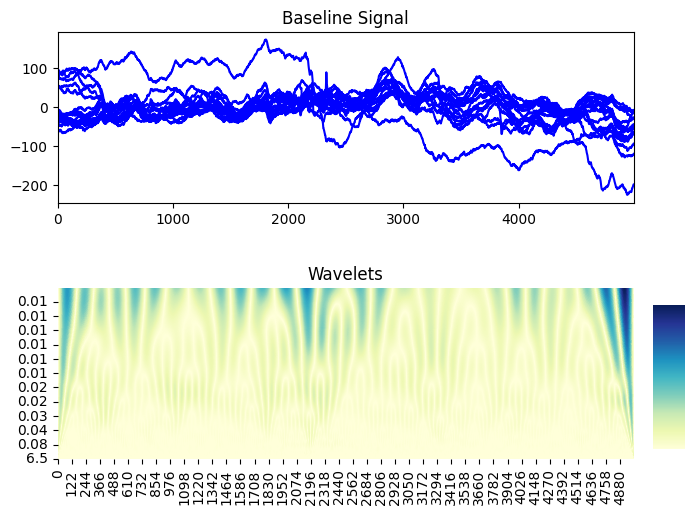

In [ ]:
def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  spec_ax.invert_yaxis()
  plt.show()

plot_cwt_scalogram(seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(baseline_df,
               baseline_wavelets,
               None, 'Baseline')

In [ ]:
!git clone https://github.com/raphaelvallat/entropy.git entropy/

Cloning into 'entropy'...
remote: Enumerating objects: 1487, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1487 (delta 0), reused 0 (delta 0), pack-reused 1477 (from 1)
Receiving objects: 100% (1487/1487), 3.38 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (953/953), done.


In [ ]:
from entropy.entropy import sample_entropy
baseline_sam = np.apply_along_axis(sample_entropy, 0, baseline_df)
seizure_sam = np.apply_along_axis(sample_entropy, 0, seizure_df)

print(color.BOLD+color.UNDERLINE+"Baseline"+color.END)
display(baseline_sam)
print(color.BOLD+color.UNDERLINE+"Seizure"+color.END)
display(seizure_sam)

Baseline


array([0.02039617, 0.08391909, 0.07627977, 0.06522442, 0.09543814,
       0.09649442, 0.08424933, 0.07106302, 0.03290584, 0.06367309,
       0.06083998, 0.07774771, 0.07390085, 0.07922252, 0.07124442,
       0.06116879])

Seizure


array([0.05930769, 0.0725612 , 0.07293632, 0.17304547, 0.1850281 ,
       0.15041659, 0.16898872, 0.14850229, 0.06801739, 0.11922381,
       0.06469757, 0.06466927, 0.09011711, 0.14640227, 0.15646532,
       0.14137236])

In [ ]:
from entropy.entropy import spectral_entropy

baseline_spec = np.apply_along_axis(spectral_entropy, 0, baseline_df, 50000,
                                method='welch', nperseg = sample_rate)

seizure_spec = np.apply_along_axis(spectral_entropy, 0, seizure_df, 50000,
                                method='welch', nperseg = sample_rate)

print(color.BOLD+color.UNDERLINE+"Baseline"+color.END)
display(baseline_spec)
print(color.BOLD+color.UNDERLINE+"Seizure"+color.END)
display(seizure_spec)

Baseline


array([1.43218729, 1.5814603 , 1.55213108, 1.58898864, 1.80384104,
       1.64604451, 1.62268096, 1.89614379, 1.81362312, 1.74085188,
       1.76689335, 1.81752955, 1.72476059, 1.7252683 , 1.62641406,
       1.50361018])

Seizure


array([1.2286079 , 1.27703933, 1.35525663, 1.65244301, 1.6931892 ,
       2.02042363, 2.29224089, 2.27373464, 2.3723636 , 2.22817092,
       2.13654783, 2.36354785, 2.5860102 , 2.63857656, 2.44178749,
       2.14392307])

In [ ]:
def fft(time_data):
  return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))

example_fft = pd.DataFrame(fft(seizure_df.T),
                           index = seizure_df.columns
                          )
example_fft.columns.name = 'freq'
example_fft.head()

freq             0         1         2         3         4         5   \
channel                                                                 
LMacro_01  5.155802  4.428991  4.952595  4.963051  5.018632  4.933607   
LMacro_02  5.091834  4.754117  4.348205  4.749003  4.786902  4.803509   
LMacro_03  5.122546  4.922297  4.664167  4.754697  4.714542  4.754044   
LMacro_04  4.124317  4.176202  4.275689  4.408950  4.211088  4.436430   
LMacro_05  4.523608  4.526302  4.278152  4.125387  3.876381  4.162434   

freq             6         7         8         9   ...        37        38  \
channel                                            ...                       
LMacro_01  4.573225  4.335850  4.359381  4.781219  ...  4.385527  3.660190   
LMacro_02  4.037222  3.971507  4.138443  4.636390  ...  3.665185  3.668130   
LMacro_03  4.033466  4.027138  3.623096  4.373355  ...  3.921200  3.893489   
LMacro_04  4.019790  3.821993  3.955903  3.630553  ...  3.970313  3.940330   
LMacro_05  4.196435  4.052715  3.935282  4.127712  ...  3.850376  3.449549   

freq             39        40        41        42        43        44  \
channel                                                                 
LMacro_01  3.936795  3.977716  4.254463  3.859291  3.875231  3.628639   
LMacro_02  3.601864  3.581013  3.915705  3.964001  3.194775  3.734109   
LMacro_03  4.043191  3.997683  4.025334  4.152647  3.579398  3.736199   
LMacro_04  4.287387  4.113205  4.243906  3.932108  3.504392  3.796894   
LMacro_05  3.933996  3.581767  3.921158  3.191490  3.349334  3.537671   

freq             45        46  
channel                        
LMacro_01  4.226006  3.920522  
LMacro_02  3.569348  3.913184  
LMacro_03  3.964112  3.849167  
LMacro_04  3.849821  3.855945  
LMacro_05  3.509503  3.621620  

[5 rows x 47 columns]

In [ ]:
from sklearn import preprocessing
example_scaled = pd.DataFrame(preprocessing.scale(example_fft, axis=0),
                              index = example_fft.index,
                              columns = example_fft.columns)
example_scaled.head()

freq             0         1         2         3         4         5   \
channel                                                                 
LMacro_01  1.269468 -0.232087  1.845822  2.073349  1.917555  2.081186   
LMacro_02  1.030624  0.966380  0.192765  1.229627  1.426161  1.655217   
LMacro_03  1.145297  1.586320  1.056946  1.252068  1.272719  1.493258   
LMacro_04 -2.581905 -1.163911 -0.005572 -0.110780  0.205123  0.453313   
LMacro_05 -1.091025  0.126617  0.001167 -1.228520 -0.504637 -0.443811   

freq             6         7         8         9   ...        37        38  \
channel                                            ...                       
LMacro_01  1.370498  1.221934  1.040679  1.983648  ...  2.189632  0.806243   
LMacro_02 -0.129760 -0.216744  0.298280  1.576192  ...  0.349192  0.826344   
LMacro_03 -0.140271  0.002927 -1.433398  0.836182  ...  1.003298  1.396888   
LMacro_04 -0.178550 -0.807128 -0.315095 -1.253583  ...  1.128780  1.515476   
LMacro_05  0.315874  0.103923 -0.384386  0.145102  ...  0.822346  0.272959   

freq             39        40        41        42        43        44  \
channel                                                                 
LMacro_01  0.963472  1.325386  1.535473  0.989638  2.500926  1.047691   
LMacro_02  0.331677  0.602988  0.892399  1.212955 -1.425506  1.485415   
LMacro_03  1.164174  1.361746  1.100511  1.615282  0.793883  1.494086   
LMacro_04  1.624811  1.572113  1.515432  1.144936  0.361079  1.745988   
LMacro_05  0.958192  0.604360  0.902750 -0.434588 -0.533652  0.670150   

freq             45        46  
channel                        
LMacro_01  2.134713  1.557656  
LMacro_02  0.356484  1.533171  
LMacro_03  1.425503  1.319550  
LMacro_04  1.116003  1.342168  
LMacro_05  0.194423  0.560236  

[5 rows x 47 columns]

In [ ]:
example_corr_matrix = pd.DataFrame(np.corrcoef(example_scaled),
                                   index = example_scaled.index,
                                   columns = example_scaled.index)

example_corr_matrix.head()

channel    LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
channel                                                                       
LMacro_01   1.000000  -0.032611  -0.158391  -0.125008  -0.356900  -0.258235   
LMacro_02  -0.032611   1.000000   0.585235  -0.043218  -0.205100  -0.158025   
LMacro_03  -0.158391   0.585235   1.000000   0.219396  -0.013824  -0.014862   
LMacro_04  -0.125008  -0.043218   0.219396   1.000000   0.548925   0.104287   
LMacro_05  -0.356900  -0.205100  -0.013824   0.548925   1.000000   0.649149   

channel    LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
channel                                                                       
LMacro_01  -0.123225  -0.199662   0.052367   0.017255  -0.153645  -0.291343   
LMacro_02  -0.058688   0.075499  -0.344903  -0.426762  -0.193705  -0.376415   
LMacro_03  -0.119426  -0.075782  -0.150491  -0.321096  -0.342602  -0.402530   
LMacro_04  -0.192822  -0.323996  -0.190788  -0.051444  -0.091676  -0.382224   
LMacro_05   0.286493   0.112045  -0.188700  -0.196228  -0.133554  -0.245111   

channel    RMacro_05  RMacro_06  RMacro_07  RMacro_08  
channel                                                
LMacro_01   0.082042   0.211194   0.245627   0.190625  
LMacro_02   0.043076  -0.079600   0.059397   0.079872  
LMacro_03   0.174705  -0.025024  -0.201490  -0.219764  
LMacro_04  -0.105587  -0.269140  -0.216580  -0.245782  
LMacro_05  -0.210979  -0.414181  -0.502917  -0.459574

In [ ]:
import numpy as np
import pandas as pd

# Assuming example_corr_matrix is defined and is a valid correlation matrix
# example_corr_matrix = pd.DataFrame(...) # Your correlation matrix here

# Calculate the eigenvalues
eigenvalues = np.linalg.eig(example_corr_matrix)[0]

# Convert eigenvalues to absolute values
eigenvalues = np.absolute(eigenvalues)

# Create a DataFrame for eigenvalues with appropriate indexing
# Convert index to string before concatenation
example_eigenvalues = pd.DataFrame(eigenvalues, index=example_corr_matrix.index.astype(str) + '|freq_eigen')

# Sort the DataFrame by eigenvalues
example_eigenvalues = example_eigenvalues.sort_values(by=0)

# Display the first few rows of the sorted eigenvalues
print(example_eigenvalues.head())

                                 0
channel                           
RMacro_01|freq_eigen  1.351834e-16
RMacro_02|freq_eigen  9.581116e-02
RMacro_03|freq_eigen  1.470176e-01
RMacro_04|freq_eigen  2.048325e-01
RMacro_05|freq_eigen  2.758433e-01


In [ ]:
import numpy as np
import pandas as pd

# Assuming example_corr_matrix is defined
# example_corr_matrix = pd.DataFrame(...) # Your correlation matrix here

# Create an upper triangular matrix with NaN below the diagonal
example_corr_nan = example_corr_matrix.where(np.triu(np.ones(example_corr_matrix.shape), k=1).astype(bool))

# Display the resulting DataFrame
print(example_corr_nan.head())

channel    LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
channel                                                                       
LMacro_01        NaN  -0.032611  -0.158391  -0.125008  -0.356900  -0.258235   
LMacro_02        NaN        NaN   0.585235  -0.043218  -0.205100  -0.158025   
LMacro_03        NaN        NaN        NaN   0.219396  -0.013824  -0.014862   
LMacro_04        NaN        NaN        NaN        NaN   0.548925   0.104287   
LMacro_05        NaN        NaN        NaN        NaN        NaN   0.649149   

channel    LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
channel                                                                       
LMacro_01  -0.123225  -0.199662   0.052367   0.017255  -0.153645  -0.291343   
LMacro_02  -0.058688   0.075499  -0.344903  -0.426762  -0.193705  -0.376415   
LMacro_03  -0.119426  -0.075782  -0.150491  -0.321096  -0.342602  -0.402530   
LMacro_04  -0.192822  -0.323996  -0.190788  -0.0514

In [ ]:
example_corr_stacked = example_corr_nan.stack()
# combine the multi_index to 1 index name
example_corr_stacked.index = ['_'.join(map(str,i)) for i in example_corr_stacked.index.tolist()]
# add the corr to the name
example_corr_stacked.index = example_corr_stacked.index+'|freq_corr'
example_corr_stacked.head()

LMacro_01_LMacro_02|freq_corr   -0.032611
LMacro_01_LMacro_03|freq_corr   -0.158391
LMacro_01_LMacro_04|freq_corr   -0.125008
LMacro_01_LMacro_05|freq_corr   -0.356900
LMacro_01_LMacro_06|freq_corr   -0.258235
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
wav_mms = mms.fit_transform(seizure_wavelets)

sc = StandardScaler()
wav_scale = sc.fit_transform(seizure_wavelets)

print(color.BOLD+color.UNDERLINE+'Before Scaling'+color.END)
display(seizure_wavelets.head())
print(color.BOLD+color.UNDERLINE+'After MinMaxScaler'+color.END)
display(pd.DataFrame(wav_mms).head())
print(color.BOLD+color.UNDERLINE+'After StandardScaler'+color.END)
display(pd.DataFrame(wav_scale).head())

Before Scaling


6.50      4.64      3.61      2.95       2.50      2.17       1.91  \
0  0.000156  0.662452 -0.186732  3.537456 -15.227347 -0.022335  10.709341   
1 -0.001216 -0.175549  0.363156  0.330337  -0.898341 -0.588849   0.015350   
2 -0.000058 -0.183648  0.348047  0.133405   0.808815 -0.102053  -1.290718   
3 -0.000042 -0.183841  0.348466  0.134293   0.802785 -0.003014  -1.285080   
4 -0.000026 -0.145835  0.265210  0.062889   0.775255  0.005811  -1.116999   

       1.71       1.55       1.41  ...        0.01        0.01        0.01  \
0 -3.050510 -18.977447 -15.626682  ...  203.251431  204.443570  204.759670   
1 -5.009944  -0.533561  11.900024  ...  200.482820  201.188566  201.764017   
2 -0.827089   1.682163  -0.686176  ...  172.708696  197.155949  198.050005   
3 -0.505978   0.345716  -0.129947  ...  169.200708  170.204215  170.684038   
4 -0.345170   0.401281   0.149532  ...  165.107275  165.633168  166.392675   

         0.01        0.01        0.01        0.01        0.01        0.01  \
0  202.380221  201.588816  199.636079  200.816283  200.741651  199.106614   
1  199.031996  198.855221  197.528256  198.489252  198.426328  194.981786   
2  171.439342  171.266600  169.701892  193.907602  194.698755  167.986945   
3  167.258954  167.417530  166.726817  166.431292  167.769555  163.265471   
4  163.309115  163.574195  162.329675  161.688623  163.402202  159.959895   

         0.01  
0  197.998654  
1  195.323100  
2  168.452463  
3  164.420019  
4  160.432525  

[5 rows x 2500 columns]

After MinMaxScaler


0         1         2         3         4         5         6     \
0  0.903750  0.961686  0.627868  1.000000  0.000000  0.815400  1.000000   
1  0.000000  0.135912  0.886193  0.332582  0.863698  0.000000  0.166189   
2  0.762636  0.127932  0.879095  0.291600  0.966599  0.700658  0.064355   
3  0.773451  0.127742  0.879292  0.291785  0.966235  0.843208  0.064795   
4  0.784267  0.165193  0.840180  0.276925  0.964576  0.855911  0.077900   

       7         8         9     ...      2490      2491      2492      2493  \
0  0.243824  0.000000  0.000000  ...  0.539524  0.539758  0.539763  0.539325   
1  0.000000  0.892751  1.000000  ...  0.539013  0.539156  0.539210  0.538706   
2  0.520497  1.000000  0.542764  ...  0.533882  0.538411  0.538524  0.533609   
3  0.560454  0.935311  0.562971  ...  0.533234  0.533432  0.533468  0.532836   
4  0.580465  0.938001  0.573124  ...  0.532478  0.532588  0.532675  0.532107   

       2494      2495      2496      2497      2498      2499  
0  0.539511  0.538953  0.539138  0.539159  0.538926  0.538733  
1  0.539006  0.538564  0.538708  0.538731  0.538164  0.538239  
2  0.533908  0.533422  0.537861  0.538041  0.533175  0.533271  
3  0.533197  0.532872  0.532784  0.533063  0.532302  0.532525  
4  0.532487  0.532059  0.531908  0.532255  0.531691  0.531788  

[5 rows x 2500 columns]

After StandardScaler


0         1         2          3          4          5          6     \
0   4.107020  6.644382 -0.987015  33.690081 -31.676954  -1.661673  15.148745   
1 -31.985388 -1.751202  1.894876   3.135712  -1.870990 -44.018081   0.027717   
2  -1.528568 -1.832336  1.815695   1.259532   1.680091  -7.621985  -1.819030   
3  -1.096631 -1.834269  1.817890   1.267990   1.667547  -0.217165  -1.811058   
4  -0.664694 -1.453509  1.381556   0.587725   1.610281   0.442711  -1.573396   

        7          8          9     ...      2490      2491      2492  \
0  -8.721624 -52.315529 -48.611188  ...  0.198936  0.200089  0.200360   
1 -14.330626  -1.466959  37.019869  ...  0.196220  0.196895  0.197421   
2  -2.356945   4.641644  -2.133729  ...  0.168971  0.192938  0.193776   
3  -1.437745   0.957149  -0.403392  ...  0.165529  0.166491  0.166920   
4  -0.977422   1.110338   0.466019  ...  0.161513  0.162005  0.162708   

       2493      2494      2495      2496      2497      2498      2499  
0  0.198151  0.197367  0.195426  0.196545  0.196452  0.194965  0.193846  
1  0.194865  0.194684  0.193357  0.194260  0.194179  0.190915  0.191219  
2  0.167787  0.167604  0.166039  0.189762  0.190518  0.164407  0.164830  
3  0.163685  0.163825  0.163118  0.162784  0.164073  0.159770  0.160870  
4  0.159808  0.160053  0.158801  0.158127  0.159784  0.156524  0.156954  

[5 rows x 2500 columns]

In [ ]:
# get the shape of this data
orig_shape = seizure_wavelets.shape
# reshape to merge the levels and data
data_reshape = np.reshape(seizure_wavelets.values, (orig_shape[0], -1))
# scale across channels
SS = StandardScaler()
data_scaled = SS.fit_transform(data_reshape.T).T
# shape the data back to channels, levels, data
data_scaled = np.reshape(data_scaled, orig_shape)

pd.DataFrame(data_scaled, columns = seizure_wavelets.columns).head()

6.50      4.64      3.61      2.95      2.50      2.17      1.91  \
0 -0.483509 -0.480614 -0.484326 -0.468046 -0.550075 -0.483608 -0.436695   
1 -0.464607 -0.465353 -0.463047 -0.463188 -0.468447 -0.467122 -0.464536   
2 -0.442513 -0.443312 -0.440996 -0.441931 -0.438988 -0.442957 -0.448136   
3 -0.433407 -0.434197 -0.431910 -0.432830 -0.429957 -0.433420 -0.438929   
4 -0.427799 -0.428421 -0.426667 -0.427530 -0.424490 -0.427774 -0.432567   

       1.71      1.55      1.41  ...      0.01      0.01      0.01      0.01  \
0 -0.496845 -0.566469 -0.551821  ...  0.404989  0.410200  0.411582  0.401181   
1 -0.486046 -0.466885 -0.413666  ...  0.393523  0.396544  0.399007  0.387313   
2 -0.446116 -0.435183 -0.445502  ...  0.309988  0.416506  0.420401  0.304457   
3 -0.435581 -0.431921 -0.433965  ...  0.293663  0.297975  0.300037  0.285319   
4 -0.429272 -0.426086 -0.427161  ...  0.276991  0.279236  0.282478  0.269316   

       0.01      0.01      0.01      0.01      0.01      0.01  
0  0.397721  0.389185  0.394344  0.394018  0.386870  0.382027  
1  0.386556  0.380877  0.384990  0.384721  0.369977  0.371438  
2  0.303705  0.296887  0.402352  0.405800  0.289415  0.291443  
3  0.286001  0.283033  0.281763  0.287513  0.268159  0.273120  
4  0.270447  0.265135  0.262398  0.269713  0.255019  0.257036  

[5 rows x 2500 columns]

## **Supervised Learning**

In [ ]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

RANDOM_STATE = 0

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# **Load Data**

In [ ]:
import pandas as pd

file_path = '/content/Patient_2_features.csv'
df = pd.read_csv(file_path)

## **Channel Selection**

In [ ]:
import pandas as pd

# Load the data from your previously saved output.csv
file_path = 'output.csv'  # Update the path if necessary
feature_df = pd.read_csv(file_path, dtype={'location': 'category'})

# Display the structure of the DataFrame
print(feature_df.info())

# Check unique locations to see available options
unique_locations = feature_df['location'].unique()
print("Unique Locations:", unique_locations)

# Select only intracranial EEG data (excluding 'surface' location)
feature_reduced = feature_df[feature_df['location'] != 'surface']

# Check the resulting unique locations after filtering
print("Filtered Unique Locations:", feature_reduced['location'].unique())

# Further filtering for specific locations if needed
# Example: Select channels that are in the 'intracranial epileptogenic zone' or 'intracranial hippocampus'
selected_locations = ['intracranial epileptogenic zone', 'intracranial hippocampus']
final_selected_channels = feature_reduced[feature_reduced['location'].isin(selected_locations)]

# Display the shape and head of the final selected DataFrame
print("Final Selected Channels Shape:", final_selected_channels.shape)
print(final_selected_channels.head())

# Optionally, save the selected channels to a new CSV
final_selected_channels.to_csv('selected_channels.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

In [ ]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced['location'].unique()

AttributeError: 'DataFrame' object has no attribute 'location'

Splitting Data

In [ ]:
import sklearn
sklearn.__version__

'1.3.2'

# **Datax**

In [ ]:
feature_df_drop = feature_df.drop(['class', 'file_id', 'location'], axis='columns')
data_x = feature_df_drop.values

data_x

array([[  77.42956361,   28.73427904,   13.10202554, ...,    5.80577268,
           4.74981903,    3.66501809],
       [1060.58507118,  480.01879575,  201.886582  , ...,    7.77002745,
           8.0621192 ,    8.02035555],
       [ 316.07659124,  186.37229784,  135.97094565, ...,    6.33693273,
           7.19739712,    7.17044911],
       ...,
       [  81.55428714,   49.70403992,   75.17451777, ...,    6.57245791,
           5.42744447,    6.1220055 ],
       [  89.63214378,   96.72602516,   93.09894163, ...,    0.        ,
           5.31796381,    4.56826703],
       [ 111.93187763,   61.40272274,   76.48485277, ...,    0.        ,
           5.6456761 ,    6.2556254 ]])

## Datay

In [ ]:
display(feature_df['class'].value_counts())

class
baseline    400
seizure     100
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create condition(group) array
class_series = feature_df['class']

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(class_series)

# get the unique labels
labels = list(class_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(le.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

baseline: 0
seizure: 1


array([0, 0, 0, 0, 0])

In [ ]:
feature_df['location'].value_counts()

location
intracranial epileptogenic zone    200
surface                            200
intracranial hippocampus           100
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# create condition(group) array
location_series = feature_df['location']

# make a label encoder
lb = LabelBinarizer()
# change the string labels to ints
data_y = lb.fit_transform(location_series)

# get the unique labels
labels = list(location_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(lb.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

intracranial epileptogenic zone: [1 0 0]
intracranial hippocampus: [0 1 0]
surface: [0 0 1]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
one_hot_y = pd.get_dummies(location_series.unique())
dummy_y = pd.get_dummies(location_series.unique(), drop_first=True)

print(color.BOLD+color.UNDERLINE+'Onehot'+color.END)
display(one_hot_y.head())
print(color.BOLD+color.UNDERLINE+'Dummy'+color.END)
display(dummy_y.head())

Onehot


intracranial epileptogenic zone  intracranial hippocampus  surface
0                             True                     False    False
1                            False                      True    False
2                            False                     False     True

Dummy


intracranial hippocampus  surface
0                     False    False
1                      True    False
2                     False     True

### Training and Test Data

In [ ]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
# drop the columns which are not feature variables
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'], axis='columns')
# change to an array
data_x = feature_reduced_drop.values
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

print(color.BOLD+'Feature DataFrame'+color.END)
display(data_x.shape)
print(color.BOLD+'Target DataFrame'+color.END)
display(data_y.shape)

Feature DataFrame


(300, 36)

Target DataFrame


(300,)

In [ ]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(color.BOLD+color.UNDERLINE+'Feature DataFrame'+color.END)
print('Training size: ' + str(X_train.shape))
print('Validation size: ' + str(X_val.shape))
print('Test size: ' + str(X_test.shape))
print(color.BOLD+color.UNDERLINE+'\nTarget DataFrame'+color.END)
print('Training size: ' + str(y_train.shape))
print('Validation size: ' + str(y_val.shape))
print('Test size: ' + str(y_test.shape))

Feature DataFrame
Training size: (243, 36)
Validation size: (27, 36)
Test size: (30, 36)

Target DataFrame
Training size: (243,)
Validation size: (27,)
Test size: (30,)


In [ ]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts


print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


Counts  Percent
Class_ID                 
0            169     70.0
1             74     30.0


Test DataFrame


Counts  Percent
Class_ID                 
0             17     57.0
1             13     43.0

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

## Balancing the Classes

In [ ]:
feature_list = list(feature_reduced_drop.columns)
feature_list

In [ ]:
x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

reduced_array = X_train_scale[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]
reduced_df = pd.DataFrame(reduced_array, columns=[x_axis_label, y_axis_label])

reduced_df.head()

CZ|D1_ratio  CZ|D2_ratio
0     0.614533     0.007356
1    -1.367899    -0.728042
2     1.384150     0.588297
3     0.754261     0.142999
4     0.308568     0.976768

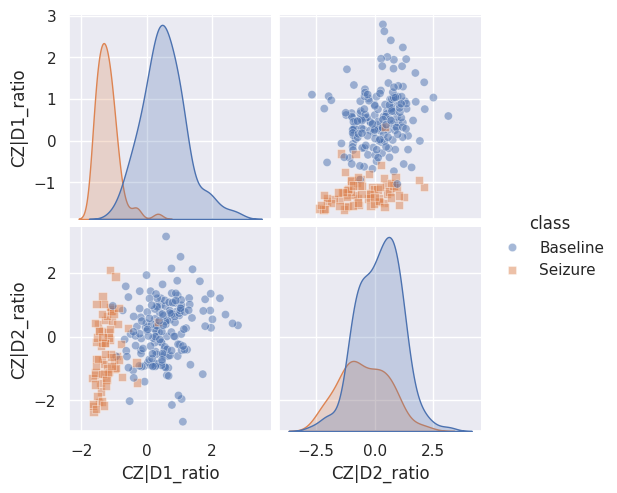

In [ ]:
import seaborn as sns; sns.set(color_codes=True)

def plot_pairplot(data_x, data_y):

    data_plot = data_x.copy()
    data_plot['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(data_y)
    sns.pairplot(data_plot,
                 hue = 'class',
                 hue_order = ['Baseline','Seizure'],
                 markers=["o", "s"],
                 plot_kws=dict(alpha = 0.5))
    plt.show()

plot_pairplot(reduced_df, y_train)

## Under-Sampling

Resample

Before Resample
Counter({0: 169, 1: 74})


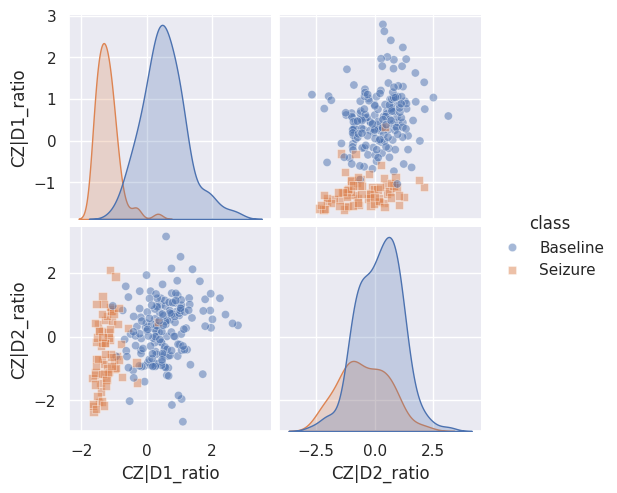

After Resample
Counter({1: 74, 0: 74})


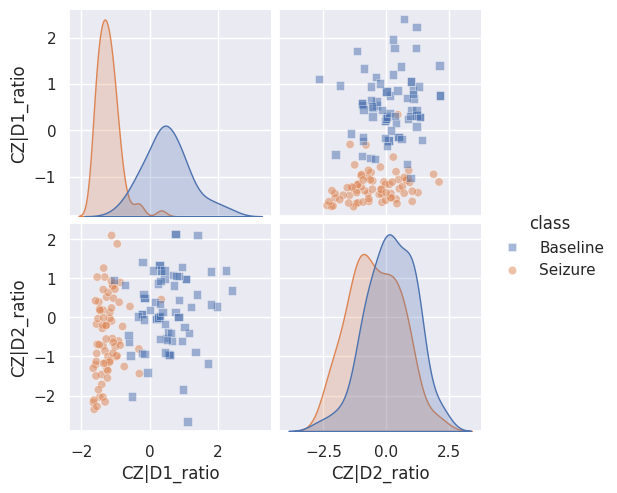

In [ ]:
from sklearn.utils import resample
from collections import Counter

print(color.UNDERLINE + 'Before Resample' + color.END)
print(Counter(y_train))
plot_pairplot(reduced_df, y_train)

print(color.UNDERLINE + 'After Resample' + color.END)
data_x_downsampled, data_y_downsampled = resample(reduced_df[y_train == 0],
                                                  y_train[y_train == 0],
                                                  replace=True,
                                                  n_samples=reduced_df[y_train == 1].shape[0],
                                                  random_state=123)

data_x_bal = np.vstack((reduced_df[y_train == 1], data_x_downsampled))
data_y_bal = np.hstack((y_train[y_train == 1], data_y_downsampled))
print(Counter(data_y_bal))

plot_pairplot(pd.DataFrame(data_x_bal, columns = reduced_df.columns),
              pd.DataFrame(data_y_bal))

RandomUnderSampler

Before Resample
Counter({0: 169, 1: 74})


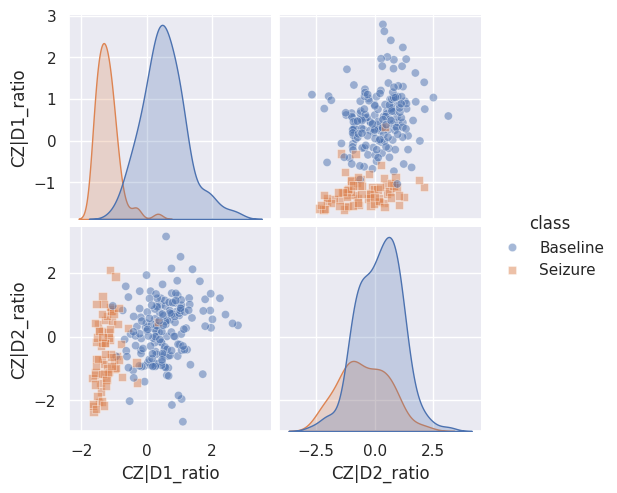

After Resample
Counter({0: 74, 1: 74})


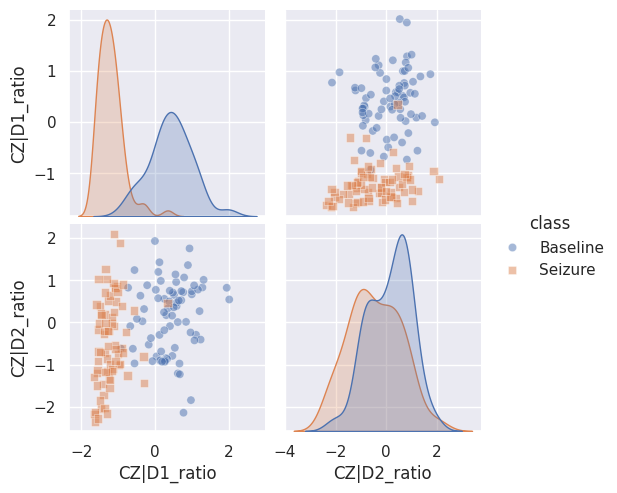

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def imblearn_sample(sampler, data_x, data_y):

    print(color.UNDERLINE + 'Before Resample' + color.END)
    print(Counter(data_y))
    plot_pairplot(data_x, data_y)

    print(color.UNDERLINE + 'After Resample' + color.END)
    data_x_downsampled, data_y_downsampled = sampler.fit_resample(data_x,
                                                                data_y)
    print(Counter(data_y_downsampled))

    plot_pairplot(pd.DataFrame(data_x_downsampled, columns = data_x.columns),
                  pd.DataFrame(data_y_downsampled))

imblearn_sample(RandomUnderSampler(random_state=123), reduced_df, y_train)

## **Over-Sampling**

RandomOverSampler

Before Resample
Counter({0: 169, 1: 74})


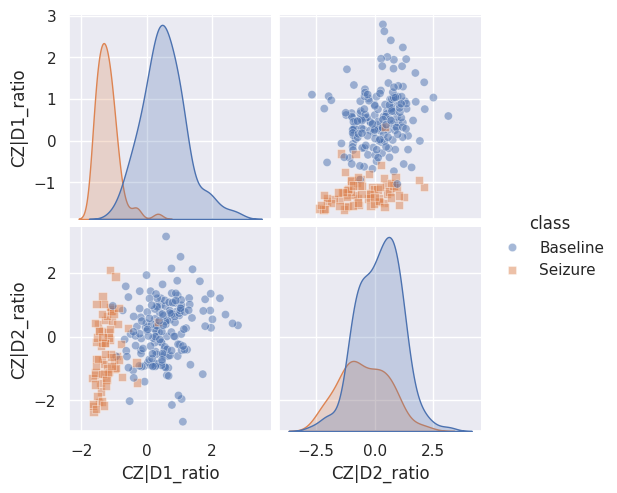

After Resample
Counter({0: 169, 1: 169})


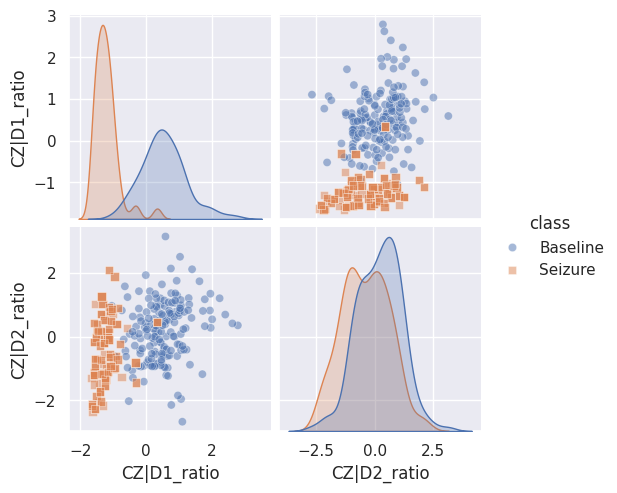

In [ ]:
from imblearn.over_sampling import RandomOverSampler

imblearn_sample(RandomOverSampler(random_state=123), reduced_df, y_train)

ADASYN and SMOTE

SMOTE
Before Resample
Counter({0: 169, 1: 74})


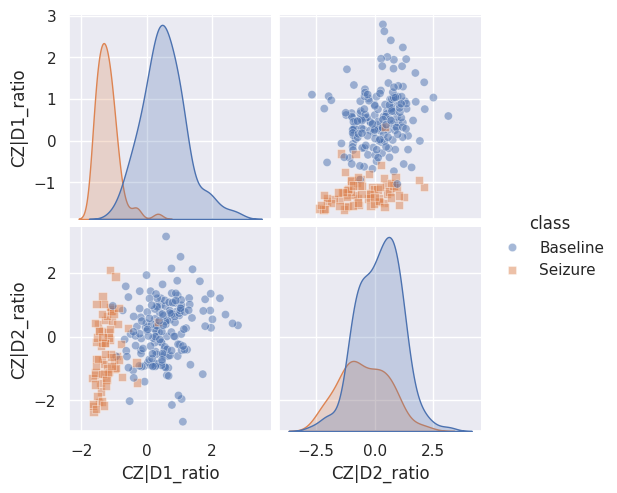

After Resample
Counter({0: 169, 1: 169})


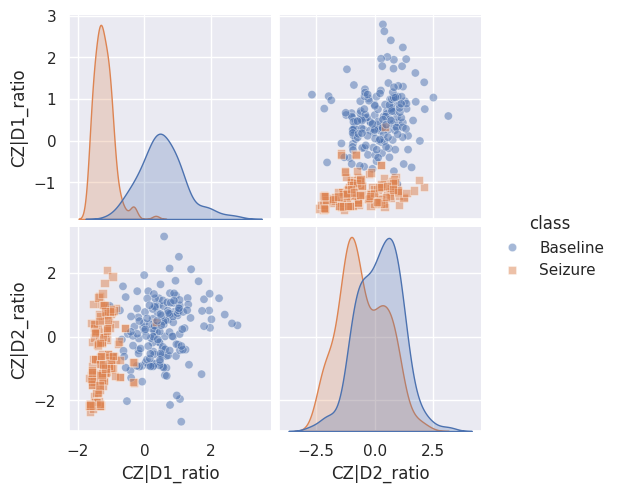

ADASYN
Before Resample
Counter({0: 169, 1: 74})


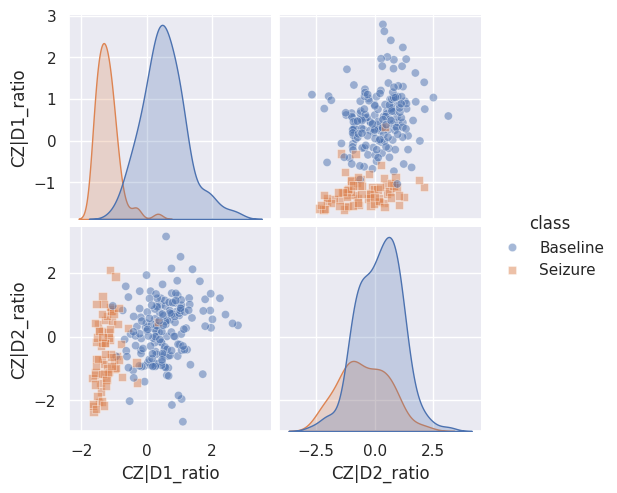

After Resample
Counter({0: 169, 1: 167})


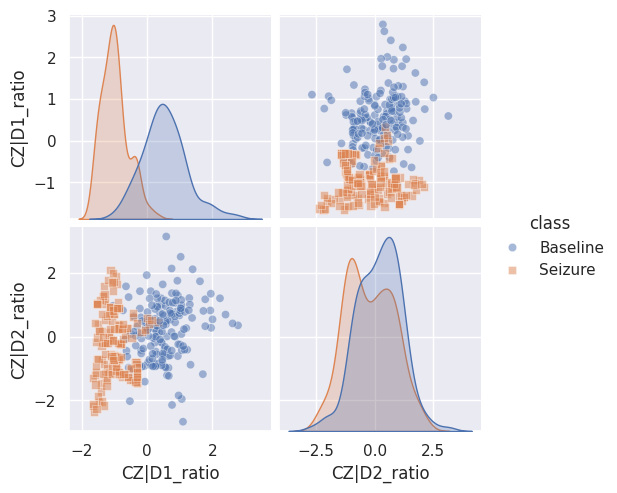

SMOTE with Edited Nearest Neighbor
Before Resample
Counter({0: 169, 1: 74})


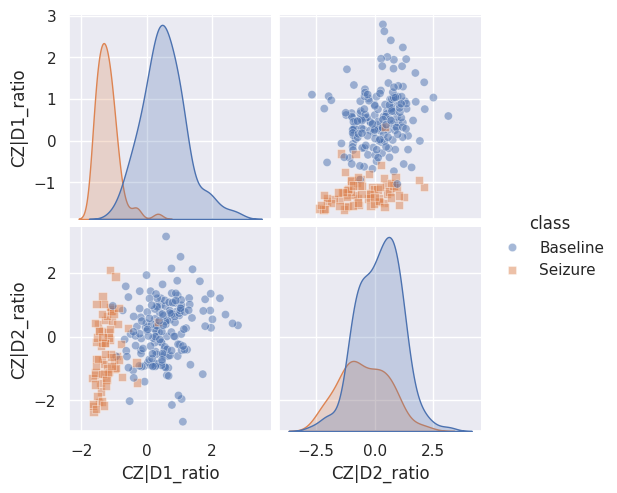

After Resample
Counter({0: 151, 1: 148})


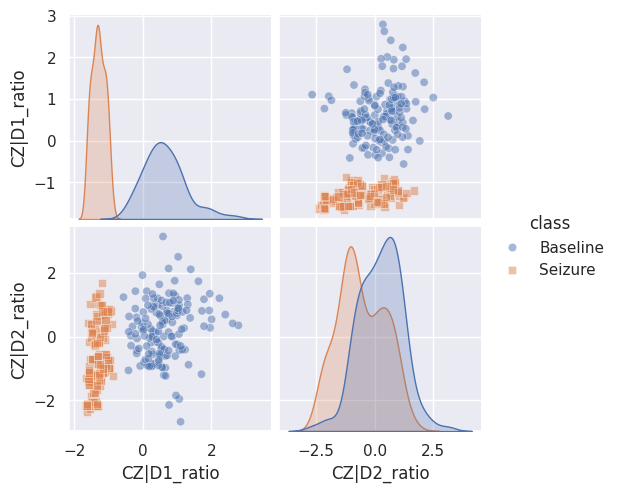

SMOTE with Tomek links
Before Resample
Counter({0: 169, 1: 74})


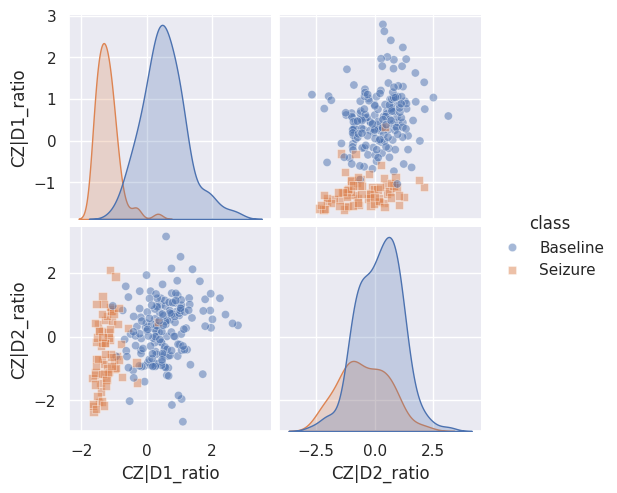

After Resample
Counter({0: 166, 1: 166})


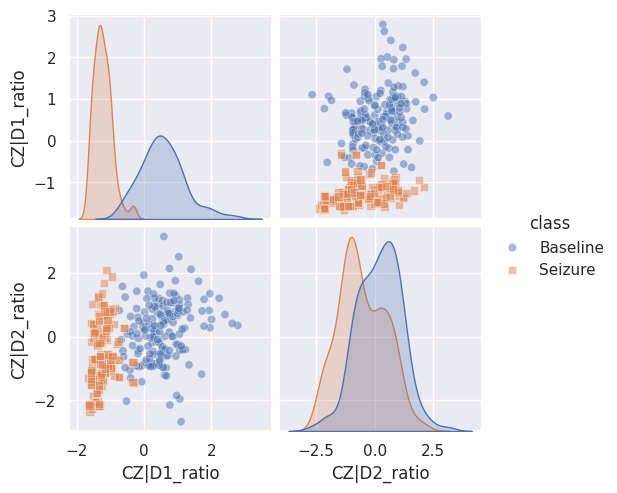

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

print(color.BOLD+color.UNDERLINE+'SMOTE'+color.END)
imblearn_sample(SMOTE(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'ADASYN'+color.END)
imblearn_sample(ADASYN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Edited Nearest Neighbor'+color.END)
imblearn_sample(SMOTEENN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Tomek links'+color.END)
imblearn_sample(SMOTETomek(random_state=123), reduced_df, y_train)

### **Binary Classification**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100.,
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

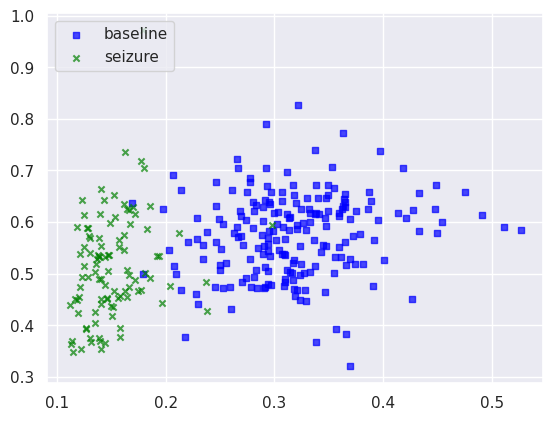

In [ ]:
from mlxtend.plotting import category_scatter

x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=feature_reduced, legend_loc='upper left')

feature_list = list(feature_reduced_drop.columns)
vis_data = X_train_scale[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

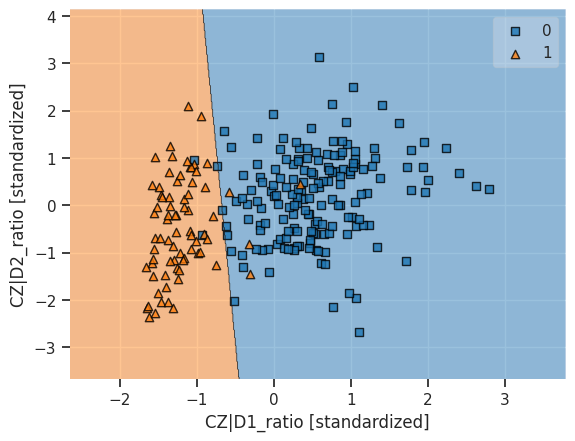

In [ ]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]')
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

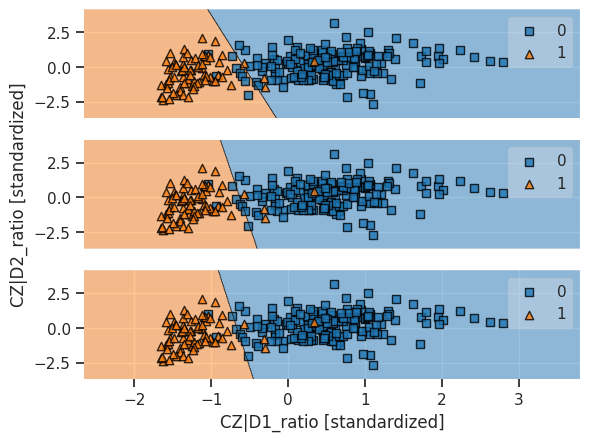

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg,
                          ax = axes[i])
    axes[i].get_xaxis().set_visible(False)

axes[2].get_xaxis().set_visible(True)
plt.xlabel(x_axis_label + ' [standardized]')
axes[1].set_ylabel(y_axis_label + ' [standardized]')
plt.savefig('log_change_reg.png')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100,
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced',
                                    random_state=0, solver='liblinear'))])

In [ ]:
pipe_reg.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Validation Accuracy: 1.000


In [ ]:
log_predicted = pipe_reg.predict(X_val)
log_predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

In [ ]:
y_val

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

## **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced',
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 SVC(C=100, class_weight='balanced', kernel='linear',
                     random_state=0))])

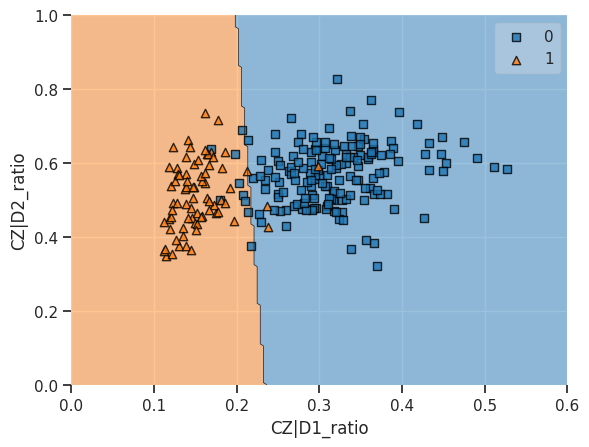

In [ ]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_linear_boundary.png')
plt.show()

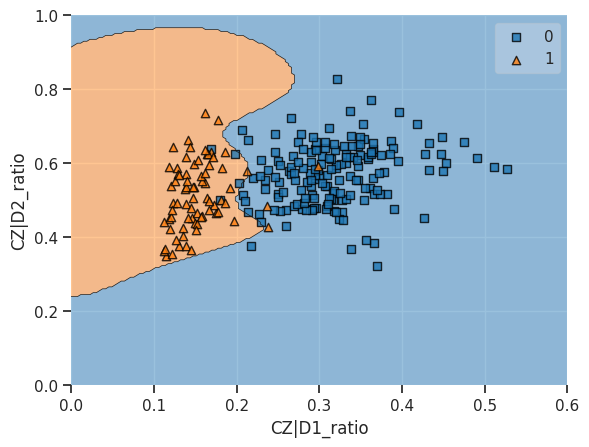

In [ ]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced',
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_rbf_boundary.png')
plt.show()

In [ ]:
pipe_svc_rbf.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Validation Accuracy: 1.000


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
!pip install graphviz

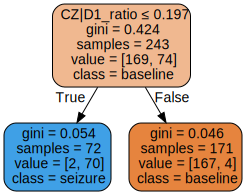

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz

DT.fit(vis_data, y_train)
dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('binary_split.png')

# Show it
graphviz.Source(dot_data)

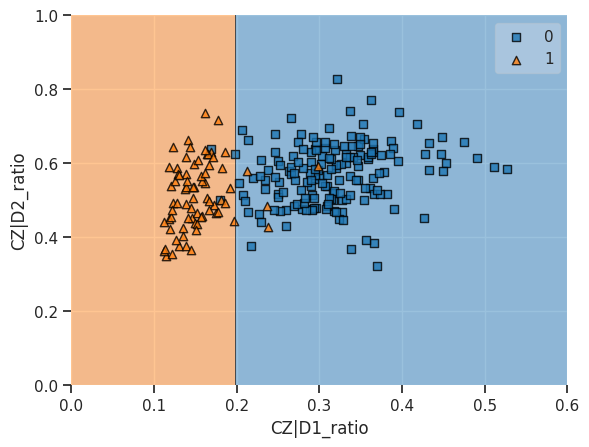

In [ ]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

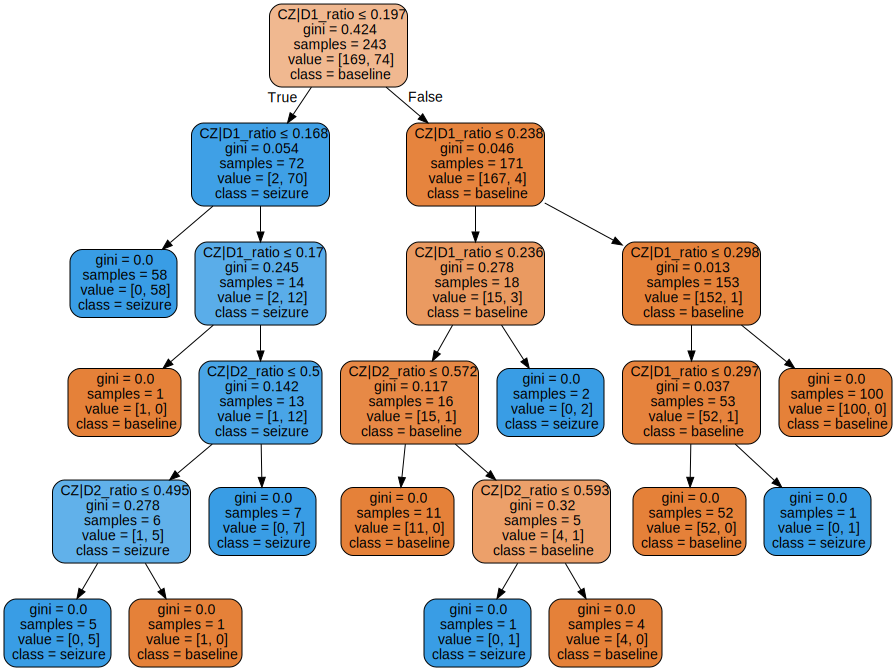

In [ ]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(vis_data, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('multi_split.png')

# Show it
graphviz.Source(dot_data)

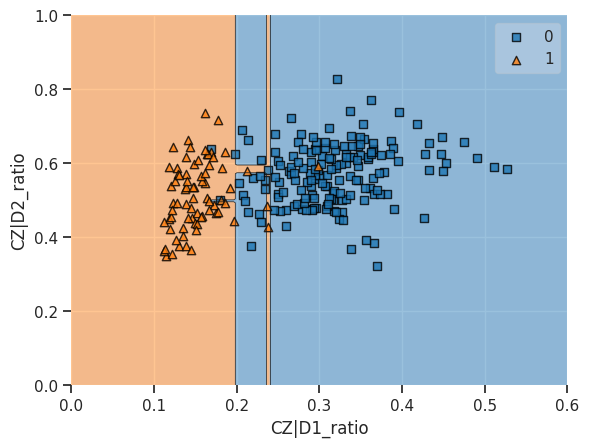

In [ ]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

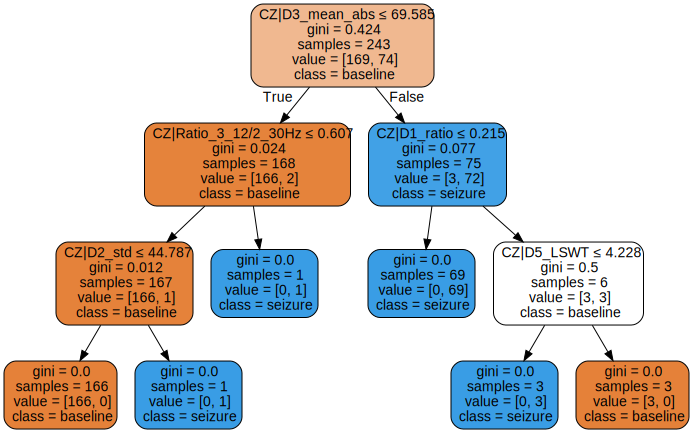

In [ ]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=feature_reduced_drop.columns,
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

graphviz.Source(dot_data)

In [ ]:
print('Validation Accuracy: %.3f' % DT.score(X_val, y_val))

Validation Accuracy: 1.000


## K-Nearest Neighbors

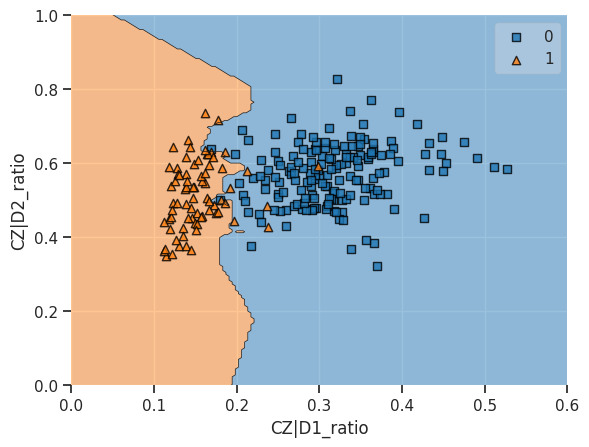

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=2))])

pipe_knn.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_knn)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [ ]:
pipe_knn.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_knn.score(X_val, y_val))

Validation Accuracy: 1.000


### **Multiclass Classification**

In [ ]:
multi_data_x = feature_df.drop(['class','file_id', 'location'],
                         axis='columns').values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
multi_data_y = le.fit_transform(feature_df['location'])

multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_data_x,
                                                    multi_data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

multi_X_train, multi_X_val, multi_y_train, multi_y_val = train_test_split(multi_X_train,
                                                  multi_y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

In [ ]:
multi_DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
multi_DT.fit(multi_X_train, multi_y_train)

multi_DT.predict_proba(multi_X_val[:5,:])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

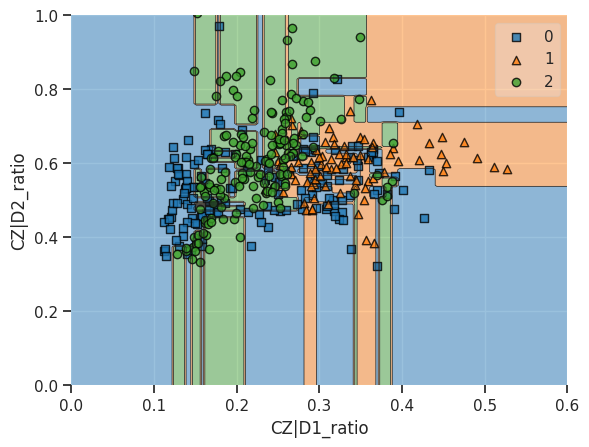

In [ ]:
multi_vis_data = multi_X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

multi_DT.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(SVC(C=100,
                                    kernel='rbf',
                                    gamma = 'auto',
                                    class_weight = 'balanced',
                                    random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.844


In [ ]:
from sklearn.multiclass import OneVsOneClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsOneClassifier(SVC(C=100,
                                   kernel='rbf',
                                   gamma = 'auto',
                                   class_weight = 'balanced',
                                   random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.889


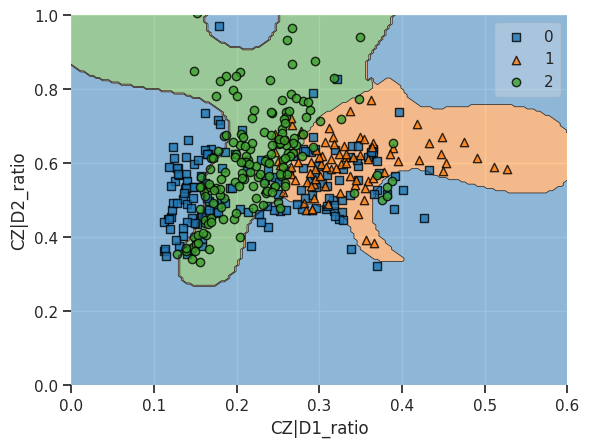

In [ ]:
multi_pipe_svc_rbf.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

### **Model Evaluation and Hyperparameter Tuning**

# **Environment Set-up**

In [ ]:
import os
import gdown
FILE_PATH = 'Epil_features.json.gzip'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv',
                './'+FILE_PATH, quiet=False)

In [ ]:
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 500 non-null    object 
 1   location              500 non-null    object 
 2   file_id               500 non-null    object 
 3   CZ|2_4Hz              500 non-null    float64
 4   CZ|4_8Hz              500 non-null    float64
 5   CZ|8_12Hz             500 non-null    float64
 6   CZ|12_30Hz            500 non-null    float64
 7   CZ|30_70Hz            500 non-null    float64
 8   CZ|Ratio_3_12/2_30Hz  500 non-null    float64
 9   CZ|D6_mean            500 non-null    float64
 10  CZ|D5_mean            500 non-null    float64
 11  CZ|D4_mean            500 non-null    float64
 12  CZ|D3_mean            500 non-null    float64
 13  CZ|D2_mean            500 non-null    float64
 14  CZ|D1_mean            500 non-null    float64
 15  CZ|D6_std             500 no

None

class                         location file_id     CZ|2_4Hz    CZ|4_8Hz  \
0  baseline  intracranial epileptogenic zone    F001    77.429564   28.734279   
1  baseline  intracranial epileptogenic zone    F002  1060.585071  480.018796   
2  baseline  intracranial epileptogenic zone    F003   316.076591  186.372298   
3  baseline  intracranial epileptogenic zone    F004   213.966621   91.338657   
4  baseline  intracranial epileptogenic zone    F005   973.296659  385.347164   

    CZ|8_12Hz  CZ|12_30Hz  CZ|30_70Hz  CZ|Ratio_3_12/2_30Hz  CZ|D6_mean  ...  \
0   13.102026    2.467909    0.462172              0.138219   -1.758529  ...   
1  201.886582   29.713494    4.070126              0.140057  -43.528777  ...   
2  135.970946   20.841888    2.781560              0.148809    7.140095  ...   
3   34.191639    3.157286    0.573759              0.064002  -15.857898  ...   
4  218.880920   47.891201    7.560384              0.183348  -21.433089  ...   

   CZ|D4_mean_abs  CZ|D3_mean_abs  CZ|D2_mean_abs  CZ|D1_mean_abs  CZ|D6_LSWT  \
0       28.409123       14.772764        5.266416        1.910710    0.000000   
1       81.999218       31.116812        8.462824        1.761159    0.000000   
2       87.018413       39.403208       10.376156        2.179047    7.534104   
3       45.580184       17.377872        4.953816        1.812019    0.000000   
4      113.995056       52.705751       17.566081        3.478807    8.055723   

   CZ|D5_LSWT  CZ|D4_LSWT  CZ|D3_LSWT  CZ|D2_LSWT  CZ|D1_LSWT  
0    6.427250    5.613190    5.805773    4.749819    3.665018  
1    8.241056    7.388935    7.770027    8.062119    8.020356  
2    0.000000    7.412203    6.336933    7.197397    7.170449  
3    6.422032    7.582963    6.947882    7.086014    6.950912  
4    0.000000    8.726303    8.031105    8.460379    8.480473  

[5 rows x 39 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'],
                                            axis='columns')
data_x = feature_reduced_drop.values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(192, 36) (48, 36) (60, 36)
(192,) (48,) (60,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(class_weight='balanced',
                                                solver = 'liblinear',
                                                random_state=RANDOM_STATE))])

# Support Vector Machine
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf',
                                class_weight = 'balanced',
                                probability=True,
                                random_state=RANDOM_STATE))])

# Decision Tree
DT = DecisionTreeClassifier(random_state=RANDOM_STATE)

# K-Nearest Neighbours
pipe_kkn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

# list of classifier names
classifier_names = ['Logistic Regression', 'Support Vector Machine',
                    'Decision Tree', 'K-Nearest Neighbors']

# list of classifiers
classifiers = [pipe_reg, pipe_svc, DT, pipe_kkn]

# fit all the classifiers to the training data
for classifier in classifiers:
  classifier.fit(X_train, y_train)

## Performance Evaluation

## Metrics

<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


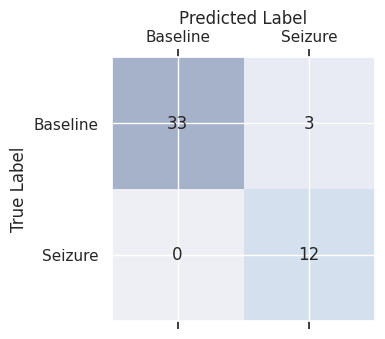

In [ ]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(confmat):

    # this creates the matplotlib graph to make the confmat look nicer
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    # change the labels
    ax.set_xticklabels(['']+['Baseline', 'Seizure'])
    ax.set_yticklabels(['']+['Baseline', 'Seizure'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ax.xaxis.set_label_position('top')

    plt.tight_layout()

    plt.show()


# use the first classifier to predict the validation set
predictions = classifiers[1].predict(X_val)

# get the confusion matrix as a numpy array
confmat = confusion_matrix(y_true=y_val, y_pred=predictions)

# use the pretty function to make it nicer
pretty_confusion_matrix(confmat)

In [ ]:
FP = confmat[0,1]
TN = confmat[0,0]
TP = confmat[1,1]
FN = confmat[1,0]

ERR = (FP+FN)/(FP+FN+TP+TN)
ACC = 1-ERR
TPR = TP/(FN+TP)
FPR = FP/(FP+TN)
PRE = TP/(TP+FP)
REC = TP/(FN+TP)
F1 = 2*((PRE*REC)/(PRE+REC))

print('True positive rate (TPR): %.3f' % TPR)
print('False positive rate (FPR): %.3f' % FPR)
print('Error (ERR): %.3f' % ERR)
print()
print('Accuracy (ACC): %.3f' % ACC)
print('Precision (PRE): %.3f' % PRE)
print('Recall (REC): %.3f' % REC)
print('F1-score (F1): %.3f' % F1)

True positive rate (TPR): 1.000
False positive rate (FPR): 0.083
Error (ERR): 0.062

Accuracy (ACC): 0.938
Precision (PRE): 0.800
Recall (REC): 1.000
F1-score (F1): 0.889


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print('Accuracy (ACC): %.3f' % accuracy_score(y_true=y_val, y_pred=predictions))
print('Precision (PRE): %.3f' % precision_score(y_true=y_val, y_pred=predictions))
print('Recall (REC): %.3f' % recall_score(y_true=y_val, y_pred=predictions))
print('F1-score (F1): %.3f' % f1_score(y_true=y_val, y_pred=predictions))

Accuracy (ACC): 0.938
Precision (PRE): 0.800
Recall (REC): 1.000
F1-score (F1): 0.889


In [ ]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_val,
                                   predictions,
                                   labels=None,
                                   target_names=['Baseline', 'Seizure'],
                                   sample_weight=None,
                                   digits=2,
                                   output_dict=True))

Baseline    Seizure  accuracy  macro avg  weighted avg
precision   1.000000   0.800000    0.9375   0.900000      0.950000
recall      0.916667   1.000000    0.9375   0.958333      0.937500
f1-score    0.956522   0.888889    0.9375   0.922705      0.939614
support    36.000000  12.000000    0.9375  48.000000     48.000000

Logistic Regression


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


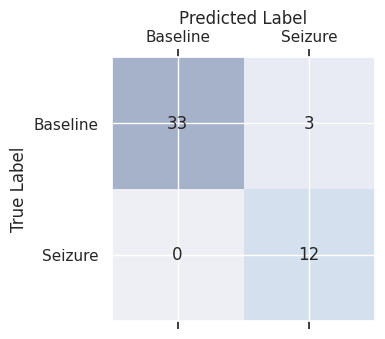

Support Vector Machine


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


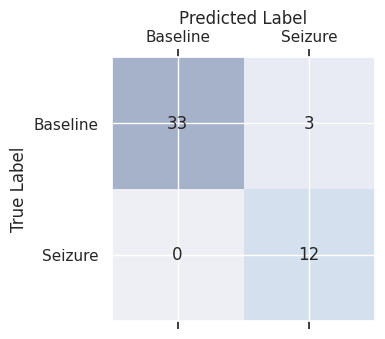

Decision Tree


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


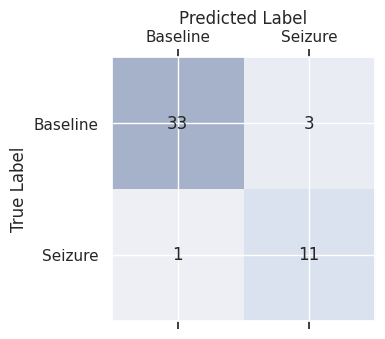

K-Nearest Neighbors


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


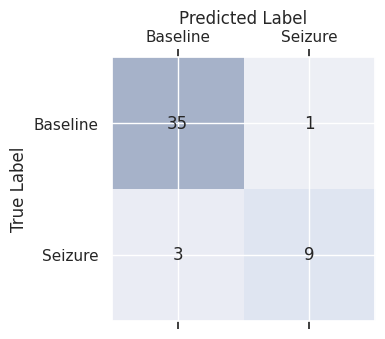

In [ ]:
for i, classifier in enumerate(classifiers):
  print(color.BOLD+color.UNDERLINE+classifier_names[i]+color.END)

  predictions = classifier.predict(X_val)

  confmat = confusion_matrix(y_true=y_val, y_pred=predictions)

  pretty_confusion_matrix(confmat)

In [ ]:
for i, classifier in enumerate(classifiers):
  predictions = classifier.predict(X_val)

  classifier_score_df = pd.DataFrame(
      classification_report(y_val,
                            predictions,
                            target_names=['Baseline', 'Seizure'],
                            digits=2,
                            output_dict=True))

  classifier_score_df.index.name = 'Metric'
  classifier_score_df['Classifier'] = classifier_names[i]
  classifier_score_df = classifier_score_df.set_index('Classifier', append=True)

  if i == 0:
    all_scores = classifier_score_df

  else:
    all_scores = pd.concat([all_scores, classifier_score_df])

all_scores.sort_index()

Baseline    Seizure  accuracy  macro avg  \
Metric    Classifier                                                          
f1-score  Decision Tree            0.942857   0.846154  0.916667   0.894505   
          K-Nearest Neighbors      0.945946   0.818182  0.916667   0.882064   
          Logistic Regression      0.956522   0.888889  0.937500   0.922705   
          Support Vector Machine   0.956522   0.888889  0.937500   0.922705   
precision Decision Tree            0.970588   0.785714  0.916667   0.878151   
          K-Nearest Neighbors      0.921053   0.900000  0.916667   0.910526   
          Logistic Regression      1.000000   0.800000  0.937500   0.900000   
          Support Vector Machine   1.000000   0.800000  0.937500   0.900000   
recall    Decision Tree            0.916667   0.916667  0.916667   0.916667   
          K-Nearest Neighbors      0.972222   0.750000  0.916667   0.861111   
          Logistic Regression      0.916667   1.000000  0.937500   0.958333   
          Support Vector Machine   0.916667   1.000000  0.937500   0.958333   
support   Decision Tree           36.000000  12.000000  0.916667  48.000000   
          K-Nearest Neighbors     36.000000  12.000000  0.916667  48.000000   
          Logistic Regression     36.000000  12.000000  0.937500  48.000000   
          Support Vector Machine  36.000000  12.000000  0.937500  48.000000   

                                  weighted avg  
Metric    Classifier                            
f1-score  Decision Tree               0.918681  
          K-Nearest Neighbors         0.914005  
          Logistic Regression         0.939614  
          Support Vector Machine      0.939614  
precision Decision Tree               0.924370  
          K-Nearest Neighbors         0.915789  
          Logistic Regression         0.950000  
          Support Vector Machine      0.950000  
recall    Decision Tree               0.916667  
          K-Nearest Neighbors         0.916667  
          Logistic Regression         0.937500  
          Support Vector Machine      0.937500  
support   Decision Tree              48.000000  
          K-Nearest Neighbors        48.000000  
          Logistic Regression        48.000000  
          Support Vector Machine     48.000000

## Receiver Operating Characteristic (ROC) Curve

We can also use plots to visualise each models performance.

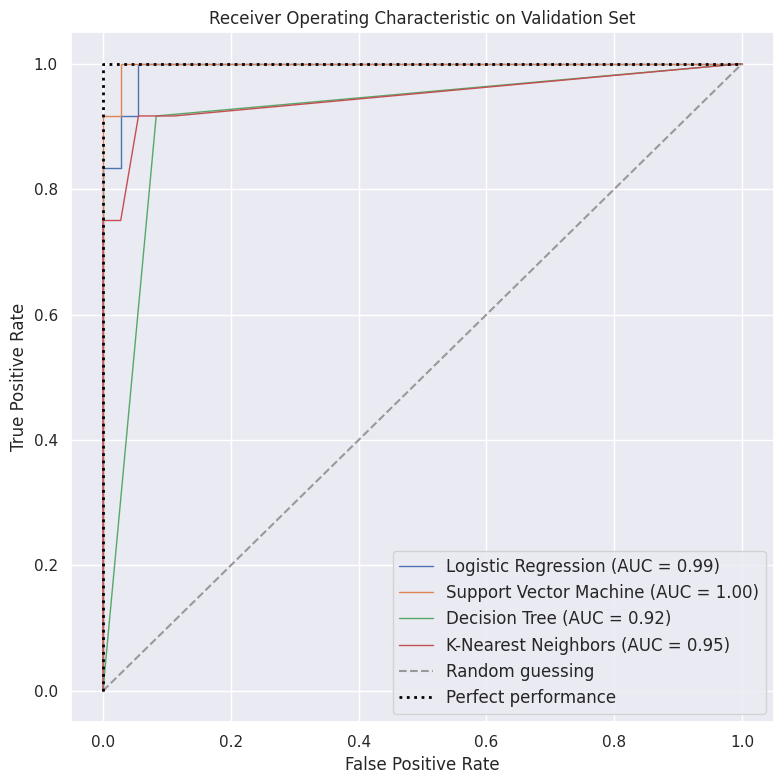

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def ROC(classifiers, classifier_names, X_train, X_val, y_train, y_val, image_file_path):
    """
    Plot the ROC curve for multiple classifiers and save the image to a specified file path.

    Parameters:
    - classifiers: List of classifier models to evaluate.
    - classifier_names: List of names corresponding to the classifiers.
    - X_train, X_val: Training and validation feature sets.
    - y_train, y_val: Training and validation labels.
    - image_file_path: Path to save the ROC curve plot.
    """
    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Iterate over each classifier
    for i, classifier in enumerate(classifiers):
        # Fit the classifier and predict probabilities for validation set
        probas = classifier.fit(X_train, y_train).predict_proba(X_val)

        # Get the ROC curve metrics
        fpr, tpr, thresholds = roc_curve(y_val, probas[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve for each classifier
        ax.plot(fpr, tpr, lw=1, label='{} (AUC = {:.2f})'.format(classifier_names[i], roc_auc))

    # Plot random guessing line
    ax.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')

    # Plot perfect performance line
    ax.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='Perfect performance')

    # Set plot limits and labels
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic on Validation Set')
    ax.legend(loc="lower right", fontsize='medium')

    # Save and display the plot
    plt.tight_layout()
    plt.savefig(image_file_path, dpi=300)
    plt.show()

ROC(classifiers, classifier_names, X_train, X_val, y_train,
    y_val, 'Classifiers_ROC.png')
